In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import shapiro

In [276]:
years = np.arange(2012,2022)
index = np.arange(0,len(df['Efficiency']),12)

In [2]:
# df = pd.read_csv("Monthly_Timeseries_2012_2021.csv")
# df = df.drop(columns="ANN")
# df = df.T
# df = df.drop(index="YEAR")
# df0 = df[0]
# df1 = df[1]
# for i in range(1,10):
#     x="df"+str(i)
#     x= df[i]
#     df0 = pd.concat([df0,x])
# df0 = df0.drop(index="PARAMETER")
# df0.to_csv("TS.csv")
# # df0.head(100)


In [3]:

# df0 = df[10]
# df1 = df[11]
# for i in range(11,20):
#     x="df"+str(i)
#     x= df[i]
#     df0 = pd.concat([df0,x])
# df0 = df0.drop(index="PARAMETER")
# df0.to_csv("IRR.csv")
# df0.head(10)


In [4]:
dfT = pd.read_csv("TS.csv")
dfI = pd.read_csv("IRR.csv")
df = dfT
df.head(100)
df["ALLSKY_SFC_SW_DWN"] = dfI["ALLSKY_SFC_SW_DWN"]
df.head(100)
df.columns = ["MO","TS","ALLSKY_SFC_SW_DWN"]


In [5]:
# n = 1
# k = 1.38*10**-23
# q = 1.6*10**-19
# T_ref = 298
# H_ref = 1000
# P_mpp_ref = 435
# I_mpp_ref = 5.97
# V_mpp_ref = 72.9
# V_oc_ref = 85.6
# I_sc_ref = 6.43
# I_sc_coeff = 2.6*10**-3
# V_oc_coeff = -.2355

# l=df["TS"].size
# Efficiency=np.empty(l)

# for j in range(l):
#         T = (df['TS'][j])+273
#         H = (df['ALLSKY_SFC_SW_DWN'][j])*1000/12
    
#         a_ref = n*k*T_ref/q
#         R_s = (a_ref *128* math.log(1-(I_mpp_ref/I_sc_ref))-V_mpp_ref+V_oc_ref)/I_mpp_ref
#         a = n*k*T/q

        # I_pv = H*(I_sc_ref + I_sc_coeff*(T-T_ref))/H_ref
        # I0 = I_pv/(math.exp((V_oc_ref + V_oc_coeff*(T-T_ref) - a_ref*128*math.log(I_sc_ref/I_pv))/(a*128)-1))

      
        # I = np.arange(0,I_pv + I0,.0002)

        # V = np.zeros_like(I)
        # P = np.zeros_like(I)
        # dP = np.zeros_like(I)
        # L = np.zeros_like(I)
        # K = np.zeros_like(I)
        # for i in range(len(I)):
        #     V[i] = a*128*math.log((-(I[i]-I_pv-I0))/I0) - I[i]*R_s
        #     P[i] = V[i] * I[i]            
      
        # '''
        # for i in range(len(P)):
        #     if P[i] == np.max(P):
        #         print((I[i]*V[i]),I[i], V[i])
        #         break
        # '''
        # Efficiency[j] = np.max(P)/(H*2.162)
        # #print(Efficiency[j])

# df["Efficiency"] = Efficiency

# df["Efficiency"].to_csv("Efficiency_Mo.csv")

In [6]:
Eff = pd.read_csv("Efficiency_Mo.csv")
df["Efficiency"] = Eff["Efficiency"] 

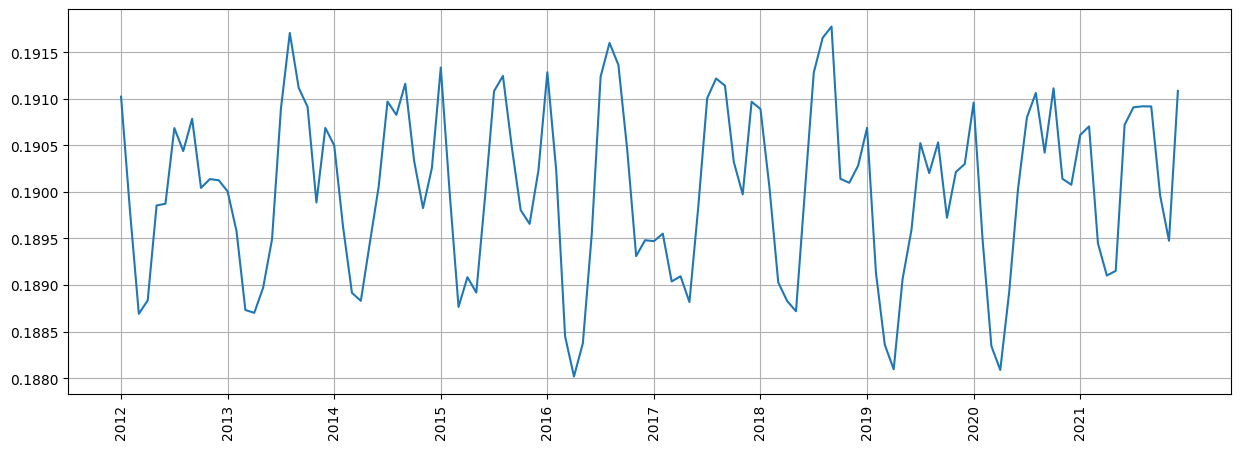

In [277]:
plt.figure(figsize=(15,5))
plt.plot(df["Efficiency"])
plt.xticks(ticks = index,labels = years,rotation = 90)

plt.grid()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(eff):
    result=adfuller(eff,maxlag=24,autolag=None)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    return result

result=adfuller_test(df['Efficiency'])

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("Weak evidence against null hypothesis,indicating it is non-stationary ")

ADF Test Statistic : -3.336332842289548
p-value : 0.013330479906570528
#Lags Used : 24
Number of Observations : 95
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


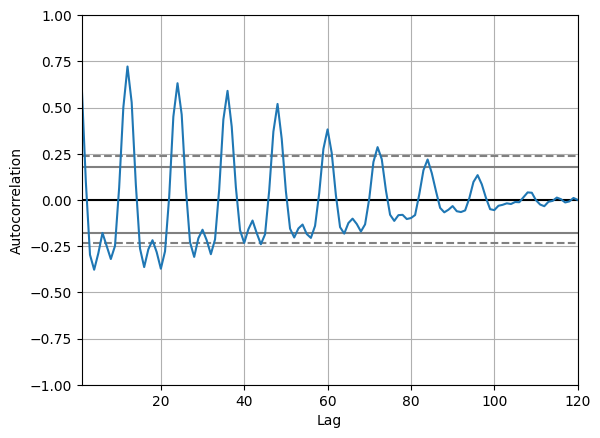

In [9]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Efficiency'])
plt.show()

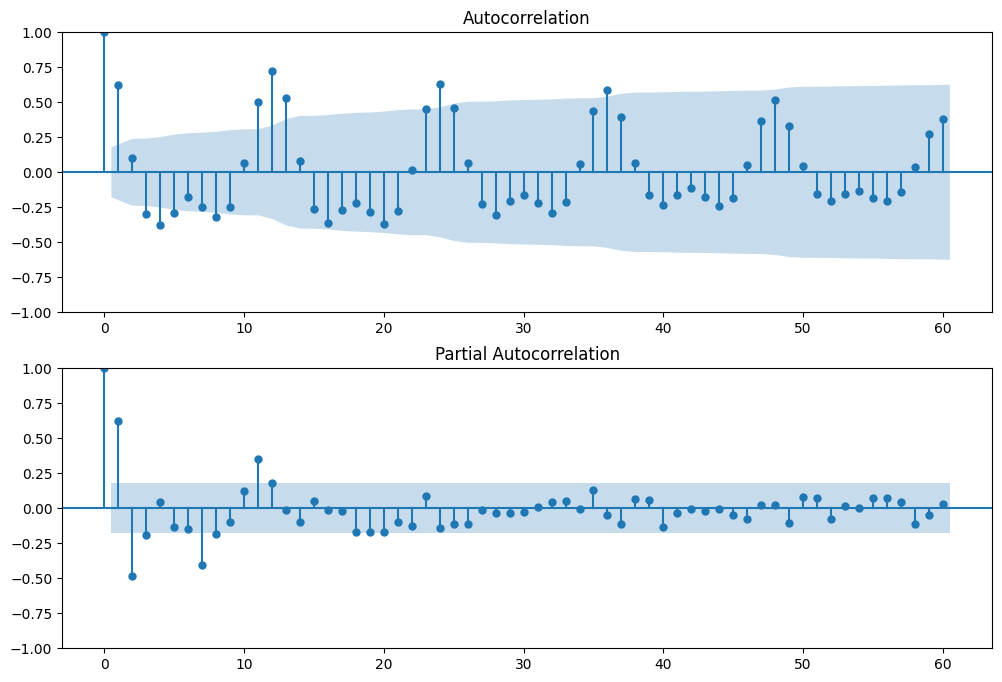

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Efficiency'],lags=60,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Efficiency'],lags=60,ax=ax2)

In [11]:
import statsmodels.api as sm
# models=sm.tsa.statespace.SARIMAX(df['Efficiency'],order=(0,0,1),seasonal_order=(1,0,0,12))
models=sm.tsa.statespace.SARIMAX(df['Efficiency'],order=(0,0,1),seasonal_order=(1,1,0,12))

models_fit=models.fit()
models_fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Efficiency   No. Observations:                  120
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                 661.609
Date:                             Sun, 14 Jul 2024   AIC                          -1317.218
Time:                                     21:19:21   BIC                          -1309.172
Sample:                                          0   HQIC                         -1313.956
                                             - 120                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4575      0.086      5.333      0.000       0.289       0.626
ar.S.L12      -0.5034      0.116     -4.324      0.000      -0.732      -0.275
sigma2       2.69e-07    3.3e-08      8.155      0.000    2.04e-07    3.34e-07
===================================================================================
Ljung-Box (L1) (Q):                   1.49   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.22   Prob(JB):                         0.10
Heteroskedasticity (H):               2.24   Skew:                             0.22
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [335]:
from statsmodels.tsa.arima.model import ARIMA
modela=ARIMA(df['Efficiency'],order=(2,0,1))
modela_fit=modela.fit()
modela_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Efficiency   No. Observations:                  120
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 721.347
Date:                Mon, 15 Jul 2024   AIC                          -1432.694
Time:                        23:47:01   BIC                          -1418.757
Sample:                             0   HQIC                         -1427.034
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1900    8.3e-05   2290.845      0.000       0.190       0.190
ar.L1          1.2000      0.149      8.044      0.000       0.908       1.492
ar.L2         -0.6610      0.106     -6.211      0.000      -0.870      -0.452
ma.L1         -0.3170      0.164     -1.932      0.053      -0.638       0.005
sigma2      3.423e-07   5.18e-08      6.611      0.000    2.41e-07    4.44e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.99   Prob(JB):                         0.67
Heteroskedasticity (H):               1.43   Skew:                             0.15
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

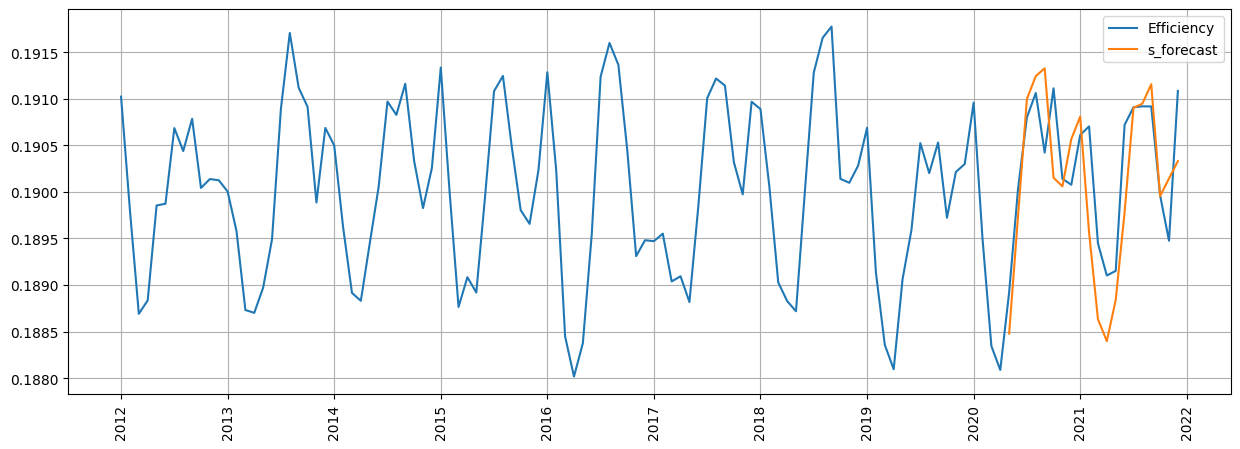

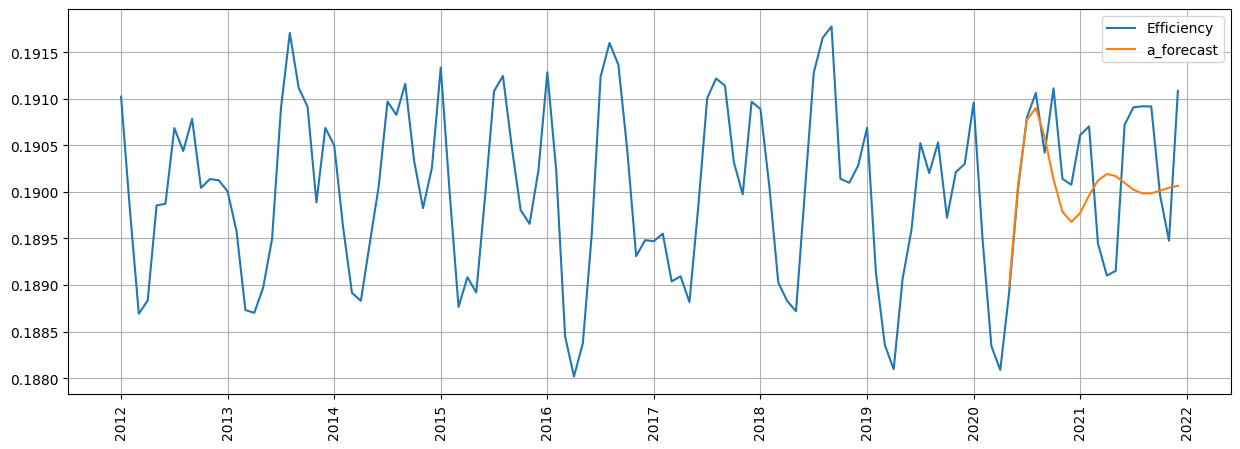

In [336]:
# df1.index=np.arange(df1.shape[0])
df['s_forecast']=models_fit.predict(start=100,end=120,dynamic=True)
df['a_forecast']=modela_fit.predict(start=100,end=120,dynamic=True)


df[['Efficiency','s_forecast']].plot(figsize=(15,5))
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.grid()
plt.show()

df[['Efficiency','a_forecast']].plot(figsize=(15,5))
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.grid()
plt.show()


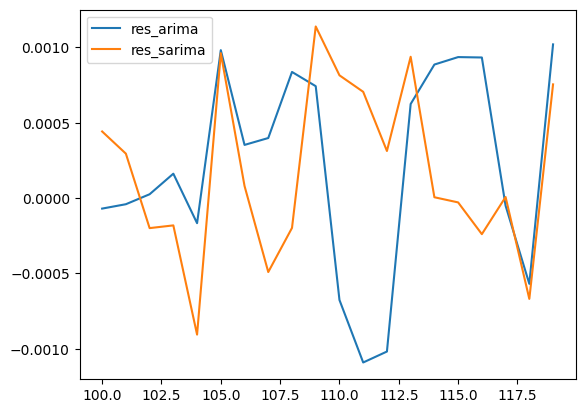

ARIMA rmse 0.0006902120828956573
SARIMA rmse 0.0005870944130959207


In [337]:
res_a = df["Efficiency"][100:]-df["a_forecast"][100:]
plt.plot(res_a, label="res_arima")
res_s = df["Efficiency"][100:]-df["s_forecast"][100:]
plt.plot(res_s,label="res_sarima")
plt.legend()
plt.show()

rmse_a = np.sqrt(np.mean(res_a**2))
rmse_s = np.sqrt(np.mean(res_s**2))

print("ARIMA rmse", rmse_a)
print("SARIMA rmse", rmse_s)


In [341]:
s_forecast_future=models_fit.forecast(12)
a_forecast_future=modela_fit.forecast(12)
a_forecast_future

120    0.191140
121    0.190671
122    0.190071
123    0.189661
124    0.189566
125    0.189722
126    0.189973
127    0.190171
128    0.190242
129    0.190197
130    0.190096
131    0.190004
Name: predicted_mean, dtype: float64

In [16]:
# df_22 = pd.read_csv("POWER_Regional_Monthly_2022.csv")
# df_22 = df_22.T
# df_22 = df_22[:]
# df_22.head(12)
# df_22.to_csv("Monthly_2022.csv")

0.1914384609655702
0.19022955688208334
0.18932257484512627
0.18943468117176954
0.1898177892047594
0.19080337982313186
0.19124934021578816
0.19135046241124612
0.19177228587104128
0.19083761763260748
0.19043525731045308
0.19036208918714417


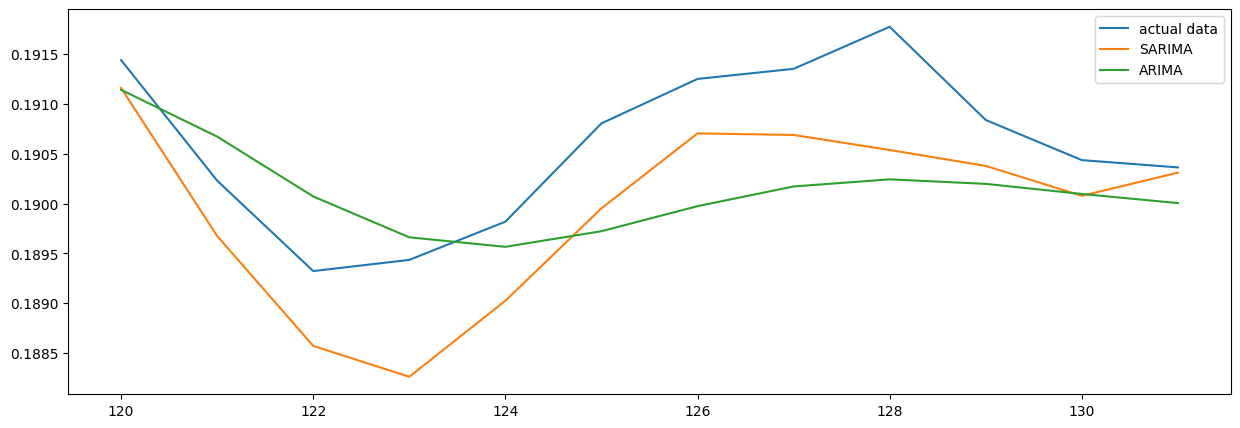

In [343]:
df_22=pd.read_csv("Monthly_2022.csv")

n = 1
k = 1.38*10**-23
q = 1.6*10**-19
T_ref = 298
H_ref = 1000
P_mpp_ref = 435
I_mpp_ref = 5.97
V_mpp_ref = 72.9
V_oc_ref = 85.6
I_sc_ref = 6.43
I_sc_coeff = 2.6*10**-3
V_oc_coeff = -.2355

Efficiency=np.empty(132)

for j in range(12):
        T = (df_22['TS'][j])+273
        H = (df_22['ALLSKY_SFC_SW_DWN'][j])*1000/12
    
        a_ref = n*k*T_ref/q
        R_s = (a_ref *128* math.log(1-(I_mpp_ref/I_sc_ref))-V_mpp_ref+V_oc_ref)/I_mpp_ref
        a = n*k*T/q

        I_pv = H*(I_sc_ref + I_sc_coeff*(T-T_ref))/H_ref
        I0 = I_pv/(math.exp((V_oc_ref + V_oc_coeff*(T-T_ref) - a_ref*128*math.log(I_sc_ref/I_pv))/(a*128)-1))

      
        I = np.arange(0,I_pv + I0,.0002)

        V = np.zeros_like(I)
        P = np.zeros_like(I)
        dP = np.zeros_like(I)
        L = np.zeros_like(I)
        K = np.zeros_like(I)
        for i in range(len(I)):
            V[i] = a*128*math.log((-(I[i]-I_pv-I0))/I0) - I[i]*R_s
            P[i] = V[i] * I[i]            
      
        '''
        for i in range(len(P)):
            if P[i] == np.max(P):
                print((I[i]*V[i]),I[i], V[i])
                break
        '''
        Efficiency[j+120] = np.max(P)/(H*2.162)
        print(Efficiency[j+120])

Efficiency[:120] = None
df_22["Efficiency"] = Efficiency[120:]

plt.figure(figsize=(15,5))
plt.plot(Efficiency,label="actual data")

plt.plot(s_forecast_future,label="SARIMA")
plt.plot(a_forecast_future,label="ARIMA")
plt.legend()
plt.show()

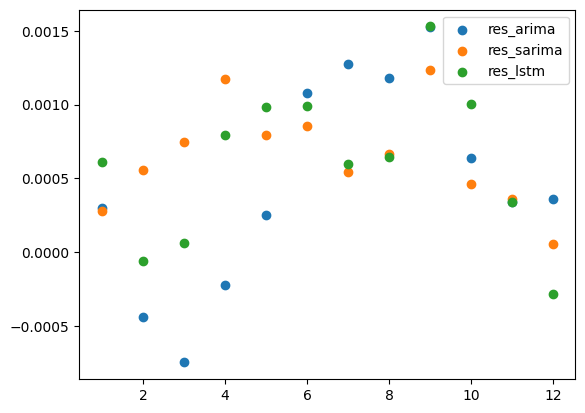

ARIMA rmse 0.0008236768121592723
SARIMA rmse 0.0007236915684830662
LSTM rmse 0.0007790059694274896


In [346]:
x = np.arange(1,13)
# print(x.shape,res_a.shape,res_ls.shape)
res_a = Efficiency[120:] - a_forecast_future[:]
plt.scatter(x,res_a, label="res_arima")
res_s = Efficiency[120:] - s_forecast_future[:]
plt.scatter(x,res_s,label="res_sarima")

res_l = Efficiency[120:] - Y_[120:]
res_ls = np.empty(132)
res_ls[:121] = np.nan
res_ls[120:] = res_l
plt.scatter(x,res_ls[120:],label="res_lstm")
plt.legend()
plt.show()

rmse_a = np.sqrt(np.mean(res_a**2))
rmse_s = np.sqrt(np.mean(res_s**2))
rmse_l = np.sqrt(np.mean(res_l**2))

print("ARIMA rmse", rmse_a)
print("SARIMA rmse", rmse_s)
print("LSTM rmse", rmse_l)



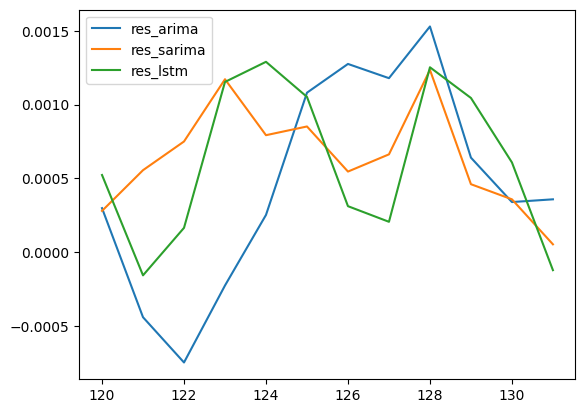

ARIMA rmse 0.0008236768121592723
SARIMA rmse 0.0007236915684830662
LSTM rmse 0.0007967228568337891


In [375]:
# print(x.shape,res_a.shape,res_ls.shape)
res_a = Efficiency[120:] - a_forecast_future[:]
plt.plot(res_a, label="res_arima")
res_s = Efficiency[120:] - s_forecast_future[:]
plt.plot(res_s,label="res_sarima")

res_l = Efficiency[120:] - Y_[120:]
res_ls = np.empty(132)
res_ls[:121] = np.nan
res_ls[120:] = res_l
plt.plot(res_ls,label="res_lstm")
plt.legend()
plt.show()

rmse_a = np.sqrt(np.mean(res_a**2))
rmse_s = np.sqrt(np.mean(res_s**2))
rmse_l = np.sqrt(np.mean(res_l**2))

print("ARIMA rmse", rmse_a)
print("SARIMA rmse", rmse_s)
print("LSTM rmse", rmse_l)



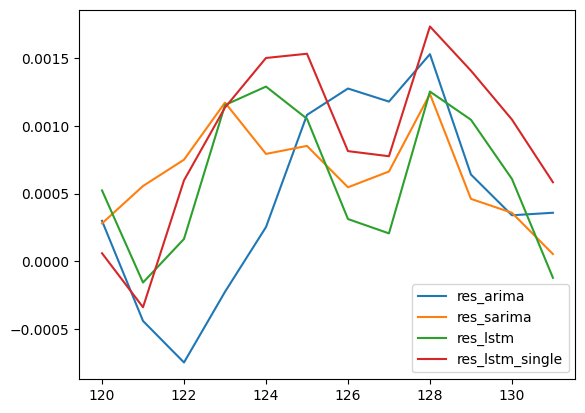

ARIMA rmse 0.0008236768121592723
SARIMA rmse 0.0007236915684830662
LSTM rmse 0.0007967228568337891
LSTM single rmse 0.0010824728159199181


In [420]:
# print(x.shape,res_a.shape,res_ls.shape)
res_a = Efficiency[120:] - a_forecast_future[:]
plt.plot(res_a, label="res_arima")
res_s = Efficiency[120:] - s_forecast_future[:]
plt.plot(res_s,label="res_sarima")

res_l = Efficiency[120:] - Y_[120:]
res_ls = np.empty(132)
res_ls[:121] = np.nan
res_ls[120:] = res_l
plt.plot(res_ls,label="res_lstm")

res_l1 = Efficiency[120:] - Y1[120:]
res_ls1 = np.empty(132)
res_ls1[:121] = np.nan
res_ls1[120:] = res_l1
plt.plot(res_ls1,label="res_lstm_single")
plt.legend()
plt.show()


rmse_a = np.sqrt(np.mean(res_a**2))
rmse_s = np.sqrt(np.mean(res_s**2))
rmse_l = np.sqrt(np.mean(res_l**2))
rmse_l1 = np.sqrt(np.mean(res_l1**2))

print("ARIMA rmse", rmse_a)
print("SARIMA rmse", rmse_s)
print("LSTM rmse", rmse_l)
print("LSTM single rmse", rmse_l1)




In [19]:
df["s_forecast_future"] = None
df["a_forecast_future"] = None

df.head(132)



,MO,TS,ALLSKY_SFC_SW_DWN,Efficiency,s_forecast,a_forecast,s_forecast_future,a_forecast_future
0,JAN,26.87,5.82,0.191023,NaN,NaN,None,None
1,FEB,28.73,6.00,0.189802,NaN,NaN,None,None
2,MAR,30.26,5.97,0.188690,NaN,NaN,None,None
3,APR,29.62,5.49,0.188834,NaN,NaN,None,None
4,MAY,28.36,5.66,0.189854,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...
115,AUG,26.19,5.03,0.190919,0.190565,0.190623,None,None
116,SEP,26.56,5.35,0.190917,0.190842,0.190275,None,None
117,OCT,26.83,4.52,0.189962,0.189826,0.190076,None,None
118,NOV,26.53,3.95,0.189475,0.190184,0.190195,None,None


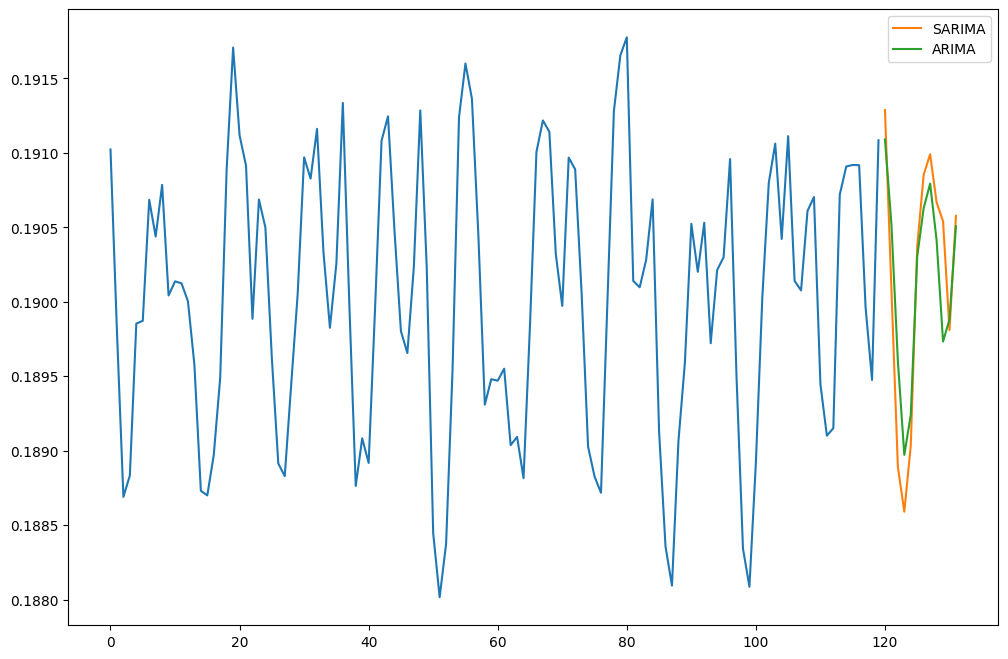

In [20]:
plt.figure(figsize=(12,8))
plt.plot(df["Efficiency"])
plt.plot(df["s_forecast_future"]._append(s_forecast_future[:]),label="SARIMA")
plt.plot(df["a_forecast_future"]._append(a_forecast_future[:]),label="ARIMA")
plt.legend()
plt.show()


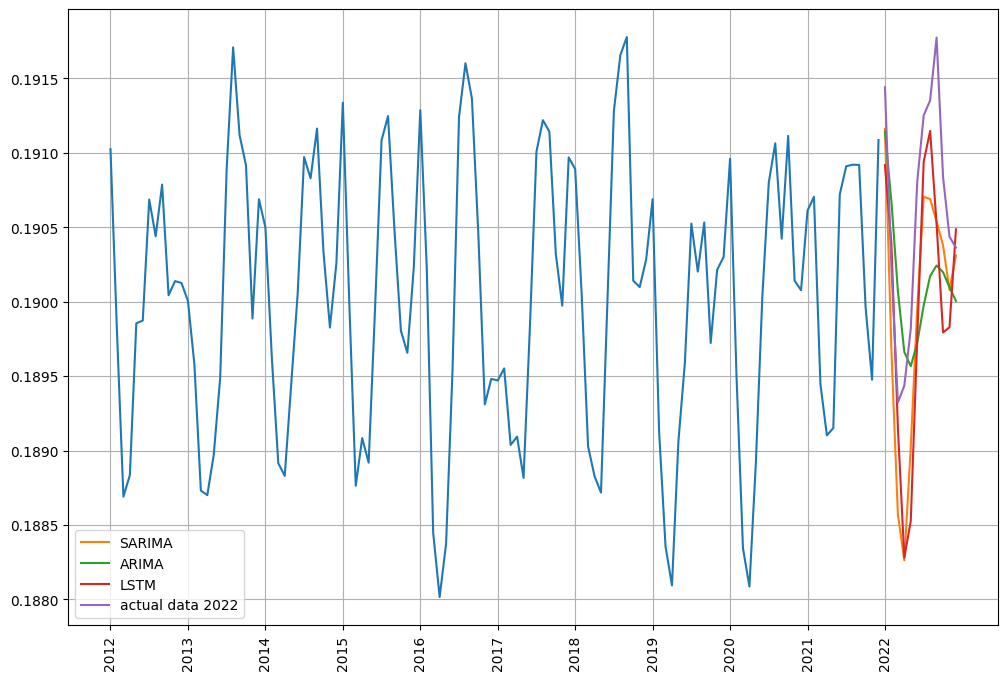

In [374]:
years = np.arange(2012,2023)
index = np.arange(0,132,12)
plt.figure(figsize=(12,8))
plt.plot(df["Efficiency"])

plt.plot(df["s_forecast_future"]._append(s_forecast_future[:]),label="SARIMA")
plt.plot(df["a_forecast_future"]._append(a_forecast_future[:]),label="ARIMA")
plt.plot(Y_,label = "LSTM")
plt.plot(Efficiency22,label = "actual data 2022")

plt.legend()
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.grid()
plt.show()


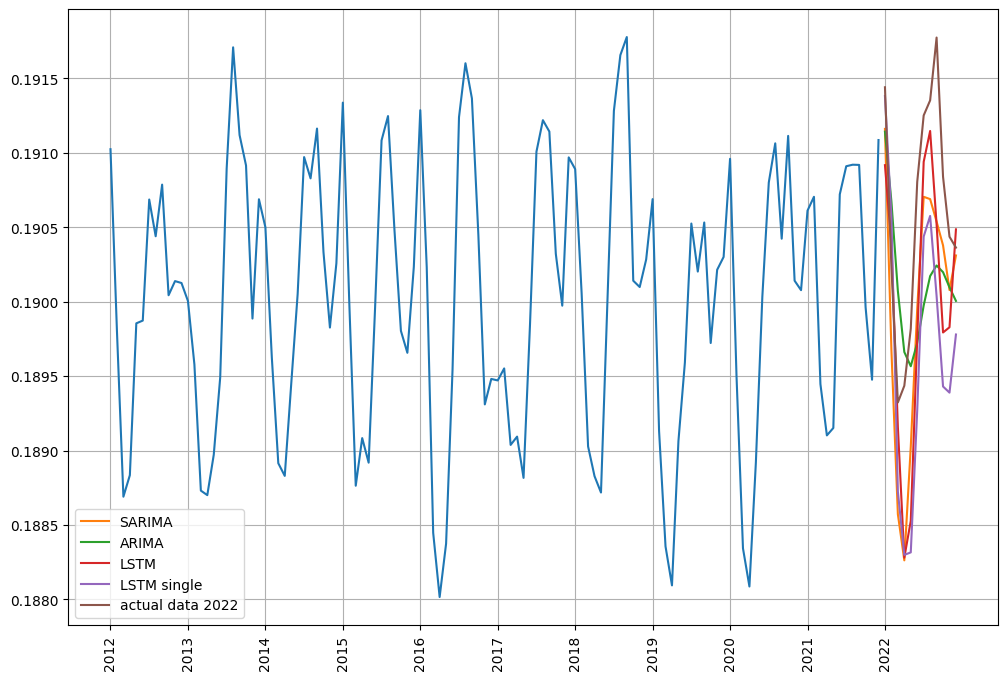

In [419]:
years = np.arange(2012,2023)
index = np.arange(0,132,12)
plt.figure(figsize=(12,8))
plt.plot(df["Efficiency"])

plt.plot(df["s_forecast_future"]._append(s_forecast_future[:]),label="SARIMA")
plt.plot(df["a_forecast_future"]._append(a_forecast_future[:]),label="ARIMA")
plt.plot(Y_,label = "LSTM")
plt.plot(Y1,label="LSTM single")
plt.plot(Efficiency22,label = "actual data 2022")

plt.legend()
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.grid()
plt.show()


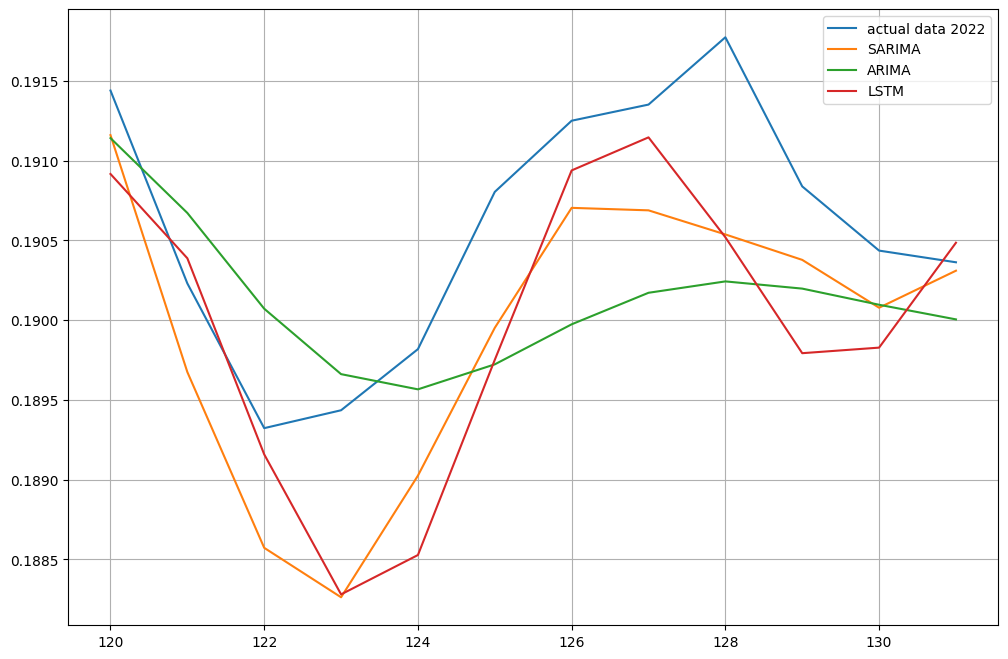

In [373]:
years = np.arange(0,11)
index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(12,8))
# plt.plot(df["Efficiency"])

plt.plot(Efficiency22,label = "actual data 2022")

plt.plot(df["s_forecast_future"]._append(s_forecast_future[:]),label="SARIMA")
plt.plot(df["a_forecast_future"]._append(a_forecast_future[:]),label="ARIMA")
plt.plot(Y_,label = "LSTM")

plt.legend()
# plt.xticks(ticks = ,labels = years,rotation = 90)
plt.grid()
plt.show()


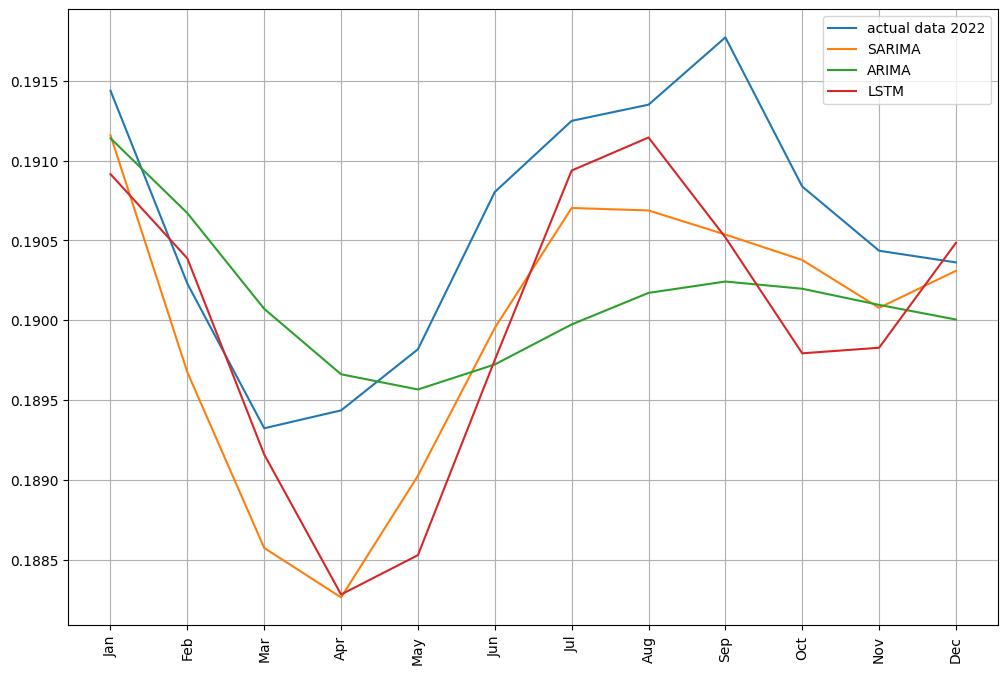

In [385]:
ind = np.arange(120,132)
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(12,8))
# plt.plot(df["Efficiency"])

plt.plot(Efficiency22,label = "actual data 2022")

plt.plot(df["s_forecast_future"]._append(s_forecast_future[:]),label="SARIMA")
plt.plot(df["a_forecast_future"]._append(a_forecast_future[:]),label="ARIMA")
plt.plot(Y_,label = "LSTM")

plt.legend()
plt.xticks(ticks=ind,labels = months,rotation = 90)
plt.grid()
plt.show()

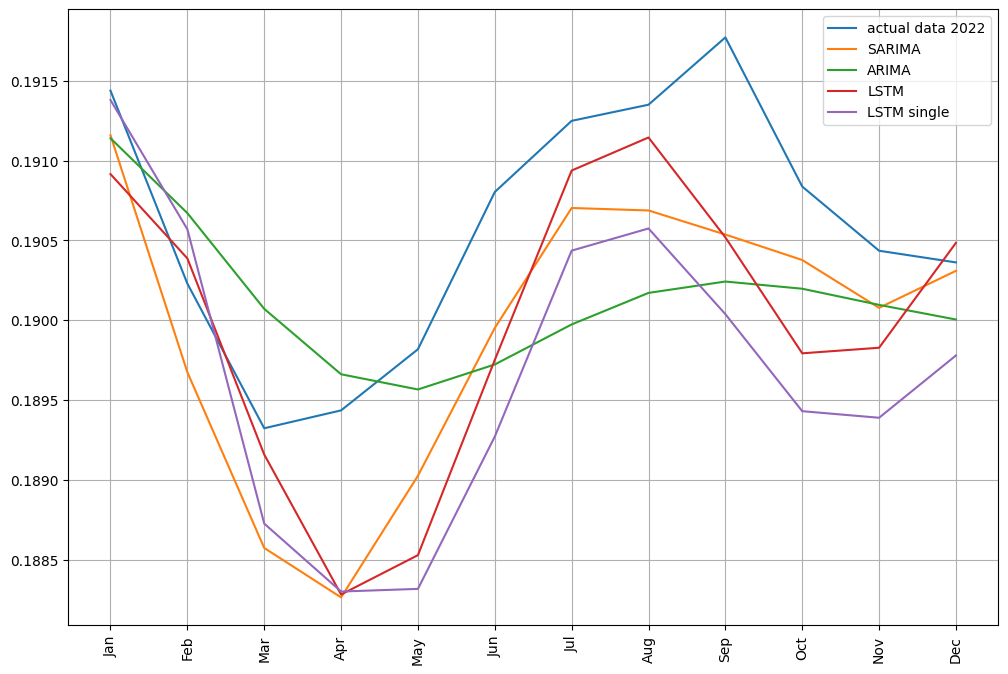

In [418]:
ind = np.arange(120,132)
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(12,8))
# plt.plot(df["Efficiency"])

plt.plot(Efficiency22,label = "actual data 2022")

plt.plot(df["s_forecast_future"]._append(s_forecast_future[:]),label="SARIMA")
plt.plot(df["a_forecast_future"]._append(a_forecast_future[:]),label="ARIMA")
plt.plot(Y_,label = "LSTM")
plt.plot(Y1,label="LSTM single")

plt.legend()
plt.xticks(ticks=ind,labels = months,rotation = 90)
plt.grid()
plt.show()

################LSTM##############################

Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 - 2s - 50ms/step - loss: 0.1669
Epoch 2/100
47/47 - 0s - 3ms/step - loss: 0.0637
Epoch 3/100
47/47 - 0s - 3ms/step - loss: 0.0491
Epoch 4/100
47/47 - 0s - 3ms/step - loss: 0.0441
Epoch 5/100
47/47 - 0s - 3ms/step - loss: 0.0392
Epoch 6/100
47/47 - 0s - 3ms/step - loss: 0.0344
Epoch 7/100
47/47 - 0s - 2ms/step - loss: 0.0297
Epoch 8/100
47/47 - 0s - 3ms/step - loss: 0.0255
Epoch 9/100
47/47 - 0s - 3ms/step - loss: 0.0220
Epoch 10/100
47/47 - 0s - 3ms/step - loss: 0.0192
Epoch 11/100
47/47 - 0s - 3ms/step - loss: 0.0172
Epoch 12/100
47/47 - 0s - 3ms/step - loss: 0.0158
Epoch 13/100
47/47 - 0s - 3ms/step - loss: 0.0149
Epoch 14/100
47/47 - 0s - 3ms/step - loss: 0.0143
Epoch 15/100
47/47 - 0s - 3ms/step - loss: 0.0138
Epoch 16/100
47/47 - 0s - 3ms/step - loss: 0.0135
Epoch 17/100
47/47 - 0s - 3ms/step - loss: 0.0133
Epoch 18/100
47/47 - 0s - 3ms/step - loss: 0.0132
Epoch 19/100
47/47 - 0s - 3ms/step - loss: 0.0130
Epoch 20/100
47/47 - 0s - 3ms/step - loss: 0.0129
Epoch 21/100
47/47 -

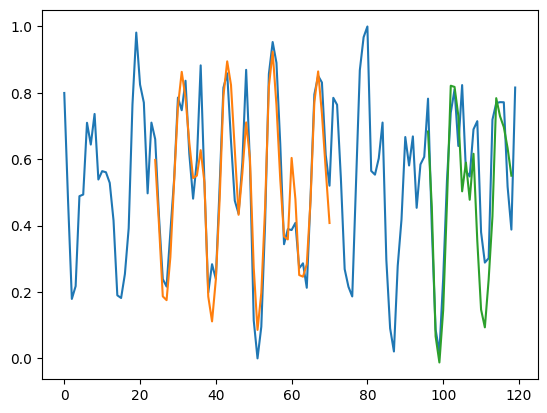

In [231]:
# LSTM 

lookback = 24

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, lookback):
 dataX, dataY = [], []
 for i in range(len(dataset)-lookback-1):
  a = dataset[i:(i+lookback), 0]
  dataX.append(a)
  dataY.append(dataset[i + lookback, 0])
 return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = pd.DataFrame(df.index.values)
dataframe["Eff"] = df["Efficiency"]
dataframe = pd.DataFrame(df["Efficiency"])
dataset = dataframe.values
# print(dataframe.head())
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * .6)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1

trainX, trainY = create_dataset(train, lookback)
testX, testY = create_dataset(test, lookback)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [386]:
# LSTM - single output
#https://stackoverflow.com/questions/69906416/forecast-future-values-with-lstm-in-python/69912334#69912334
lookback = 24
n_forecast = 1
# import numpy as np
# import matplotlib.pyplot as plt
# from pandas import read_csv
# import math
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

# # convert an array of values into a dataset matrix
def create_dataset(dataset, n_lookback, n_forecast=1):
 X, Y = [], []
 for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])
 return np.array(X), np.array(Y)


# fix random seed for reproducibility
tf.random.set_seed(0)

# # load the dataset
dataframe = pd.DataFrame(df.index.values)
dataframe["Eff"] = df["Efficiency"]
dataframe = pd.DataFrame(df["Efficiency"])
dataset = dataframe.values
# print(dataframe.head())

# # normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


train_size = int(len(dataset) * 1)
train = dataset[0:train_size]

# # reshape into X=t and Y=t+1
trainX, trainY = create_dataset(train, lookback)

# # reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# # create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(n_forecast))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

# # make predictions
trainPredict = model.predict(trainX)

# # invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
# # trainY = scaler.inverse_transform(trainY)

# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict

# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.show()

Epoch 1/200


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


96/96 - 2s - 20ms/step - loss: 0.1259
Epoch 2/200
96/96 - 0s - 1ms/step - loss: 0.0402
Epoch 3/200
96/96 - 0s - 1ms/step - loss: 0.0335
Epoch 4/200
96/96 - 0s - 1ms/step - loss: 0.0279
Epoch 5/200
96/96 - 0s - 1ms/step - loss: 0.0233
Epoch 6/200
96/96 - 0s - 1ms/step - loss: 0.0201
Epoch 7/200
96/96 - 0s - 1ms/step - loss: 0.0180
Epoch 8/200
96/96 - 0s - 1ms/step - loss: 0.0168
Epoch 9/200
96/96 - 0s - 1ms/step - loss: 0.0159
Epoch 10/200
96/96 - 0s - 1ms/step - loss: 0.0154
Epoch 11/200
96/96 - 0s - 1ms/step - loss: 0.0150
Epoch 12/200
96/96 - 0s - 1ms/step - loss: 0.0147
Epoch 13/200
96/96 - 0s - 1ms/step - loss: 0.0145
Epoch 14/200
96/96 - 0s - 1ms/step - loss: 0.0143
Epoch 15/200
96/96 - 0s - 1ms/step - loss: 0.0141
Epoch 16/200
96/96 - 0s - 1ms/step - loss: 0.0140
Epoch 17/200
96/96 - 0s - 1ms/step - loss: 0.0139
Epoch 18/200
96/96 - 0s - 1ms/step - loss: 0.0137
Epoch 19/200
96/96 - 0s - 1ms/step - loss: 0.0136
Epoch 20/200
96/96 - 0s - 1ms/step - loss: 0.0135
Epoch 21/200
96/96 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[array([[0.19137967]], dtype=float32), array([[0.19056983]], dtype=float32), array([[0.18872525]], dtype=float32), array([[0.1882993]], dtype=float32), array([[0.18831602]], dtype=float32), array([[0.18927033]], dtype=float32), array([[0.19043595]], dtype=float32), array([[0.19057472]], dtype=float32), array([[0.19003777]], dtype=float32), array([[0.18942967]], dtype=float32), array([[0.18938847]], dtype=float32), array([[0.18977876]], dtype=float32)]
[0.19137967 0.19056983 0.18872525 0.1882993  0.18831602 0.18927033
 0.19043595 0.1905747

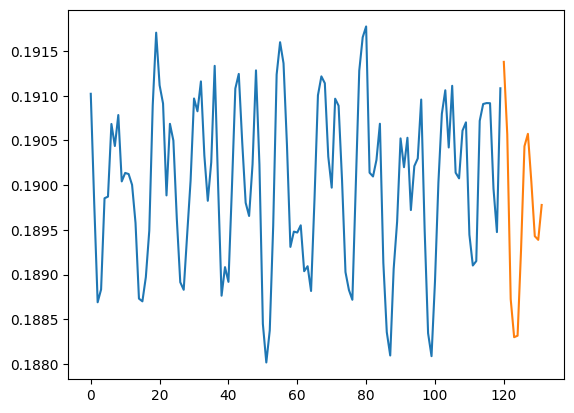

In [417]:
X_1 = dataset[- lookback:]  # last available input sequence
X_1 = X_1.reshape(1,1, lookback)
# Y_1 = model.predict(X_1).reshape(-1, 1)
# print(scaler.inverse_transform(Y_1))
# Y_1 = Y_1.reshape(1,1,1)
# X_1 = np.append(X_1,Y_1,axis=2)
# print(X_1.shape,Y_1.shape)
Y1 = []
for i in range(12):
  Y_1 = model.predict(X_1).reshape(-1, 1)
  Y1.append(scaler.inverse_transform(Y_1))
  Y_1 = Y_1.reshape(1,1,1)
  X_1 = X_1[:,:,1:]
#   print(X_1.ndim)
  X_1 = np.append(X_1,Y_1,axis=2)
  
Y11=[]
# Y_1 = scaler.inverse_transform(Y_1)
a = np.empty_like(dataset)
a[:,:] = np.nan
print(Y1)
Y1=np.append(a,Y1)
print(Y1[120:])
# for i in range(12):
#   Y11.append(Y1[i][0])
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(Y1)
plt.show()

In [376]:
# LSTM final
#https://stackoverflow.com/questions/69906416/forecast-future-values-with-lstm-in-python/69912334#69912334
lookback = 24
n_forecast = 12
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, n_lookback, n_forecast=12):
 X, Y = [], []
 for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])
 return np.array(X), np.array(Y)


# fix random seed for reproducibility
tf.random.set_seed(0)

# load the dataset
dataframe = pd.DataFrame(df.index.values)
dataframe["Eff"] = df["Efficiency"]
dataframe = pd.DataFrame(df["Efficiency"])
dataset = dataframe.values
# print(dataframe.head())

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


train_size = int(len(dataset) * 1)
train = dataset[0:train_size]

# reshape into X=t and Y=t+1
trainX, trainY = create_dataset(train, lookback)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(n_forecast))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=500, batch_size=1, verbose=2)

# make predictions
# trainPredict = model.predict(trainX).reshape(-1,1)

# # invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# # trainY = scaler.inverse_transform(trainY)

# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(trainPredict)
# trainPredictPlot[:, :] = trainPredict
# trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict

# plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# # plt.plot(dataset)
# plt.plot(trainPredictPlot)
# plt.show()

Epoch 1/500


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 - 2s - 22ms/step - loss: 0.2916
Epoch 2/500
85/85 - 0s - 1ms/step - loss: 0.1661
Epoch 3/500
85/85 - 0s - 2ms/step - loss: 0.0910
Epoch 4/500
85/85 - 0s - 1ms/step - loss: 0.0690
Epoch 5/500
85/85 - 0s - 1ms/step - loss: 0.0630
Epoch 6/500
85/85 - 0s - 1ms/step - loss: 0.0611
Epoch 7/500
85/85 - 0s - 1ms/step - loss: 0.0601
Epoch 8/500
85/85 - 0s - 2ms/step - loss: 0.0593
Epoch 9/500
85/85 - 0s - 1ms/step - loss: 0.0585
Epoch 10/500
85/85 - 0s - 2ms/step - loss: 0.0576
Epoch 11/500
85/85 - 0s - 1ms/step - loss: 0.0567
Epoch 12/500
85/85 - 0s - 1ms/step - loss: 0.0557
Epoch 13/500
85/85 - 0s - 1ms/step - loss: 0.0547
Epoch 14/500
85/85 - 0s - 1ms/step - loss: 0.0537
Epoch 15/500
85/85 - 0s - 2ms/step - loss: 0.0528
Epoch 16/500
85/85 - 0s - 2ms/step - loss: 0.0517
Epoch 17/500
85/85 - 0s - 1ms/step - loss: 0.0507
Epoch 18/500
85/85 - 0s - 1ms/step - loss: 0.0497
Epoch 19/500
85/85 - 0s - 1ms/step - loss: 0.0486
Epoch 20/500
85/85 - 0s - 1ms/step - loss: 0.0475
Epoch 21/500
85/85 -

Text(0.5, 0, 'Training Loss')

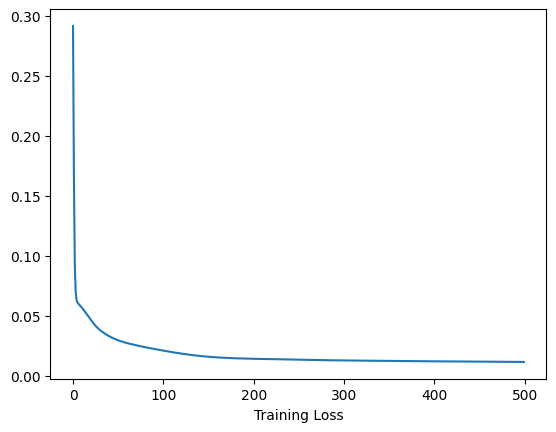

In [378]:
plt.plot(history.history["loss"])
plt.xlabel("Training Loss")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


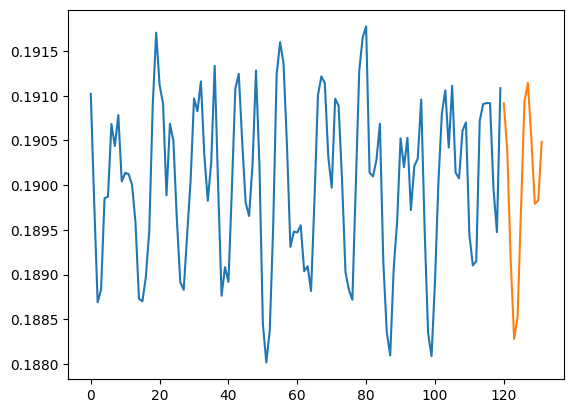

In [372]:
X_ = dataset[- lookback:]  # last available input sequence
X_ = X_.reshape(1,1, lookback)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)
a = np.empty_like(dataset)
a[:,:] = np.nan
Y_=np.append(a,Y_)
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
# plt.plot(dataset)
plt.plot(Y_)
plt.show()


In [365]:
Y_.shape

(132,)

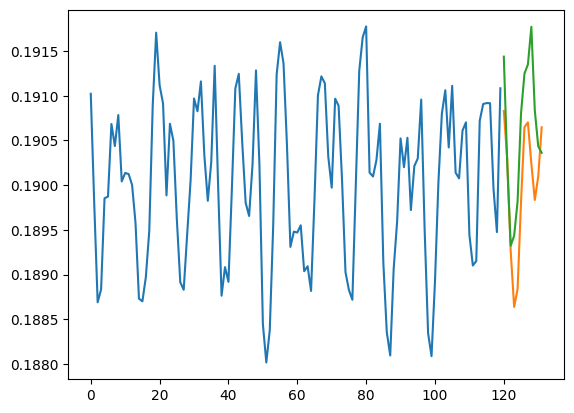

In [267]:
df_22=pd.read_csv("Monthly_2022.csv")

n = 1
k = 1.38*10**-23
q = 1.6*10**-19
T_ref = 298
H_ref = 1000
P_mpp_ref = 435
I_mpp_ref = 5.97
V_mpp_ref = 72.9
V_oc_ref = 85.6
I_sc_ref = 6.43
I_sc_coeff = 2.6*10**-3
V_oc_coeff = -.2355

Efficiency_22=np.empty(12)

for j in range(12):
        T = (df_22['TS'][j])+273
        H = (df_22['ALLSKY_SFC_SW_DWN'][j])*1000/12
    
        a_ref = n*k*T_ref/q
        R_s = (a_ref *128* math.log(1-(I_mpp_ref/I_sc_ref))-V_mpp_ref+V_oc_ref)/I_mpp_ref
        a = n*k*T/q

        I_pv = H*(I_sc_ref + I_sc_coeff*(T-T_ref))/H_ref
        I0 = I_pv/(math.exp((V_oc_ref + V_oc_coeff*(T-T_ref) - a_ref*128*math.log(I_sc_ref/I_pv))/(a*128)-1))

      
        I = np.arange(0,I_pv + I0,.0002)

        V = np.zeros_like(I)
        P = np.zeros_like(I)
        dP = np.zeros_like(I)
        L = np.zeros_like(I)
        K = np.zeros_like(I)
        for i in range(len(I)):
            V[i] = a*128*math.log((-(I[i]-I_pv-I0))/I0) - I[i]*R_s
            P[i] = V[i] * I[i]            
      
        '''
        for i in range(len(P)):
            if P[i] == np.max(P):
                print((I[i]*V[i]),I[i], V[i])
                break
        '''
        Efficiency_22[j] = np.max(P)/(H*2.162)
        # print(Efficiency[j+120])

ad = np.empty_like(dataset)
ad[:,:] = np.nan
Efficiency22 = np.append(ad,Efficiency_22.reshape(-1,1))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(Y_)
plt.plot(Efficiency22)
plt.show()



In [266]:
print(Efficiency_22)
print(Efficiency22.shape)
print(a.shape)

[0.19143846 0.19022956 0.18932257 0.18943468 0.18981779 0.19080338
 0.19124934 0.19135046 0.19177229 0.19083762 0.19043526 0.19036209]
(13,)
()


In [250]:
print(trainX.shape)
print(trainPredict.shape)
print(Y_.shape)

(96, 1, 24)
(96, 1)
(1, 1)


In [230]:
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)
print(trainPredict.shape,testPredict.shape)

(70, 1, 1) (70,)
(46, 1, 1) (46,)
(70, 1) (46, 1)


In [232]:
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)
print(trainPredict.shape,testPredict.shape)

(47, 1, 24) (47,)
(23, 1, 24) (23,)
(47, 1) (23, 1)


Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 - 2s - 36ms/step - loss: 0.1497
Epoch 2/100
47/47 - 0s - 2ms/step - loss: 0.0526
Epoch 3/100
47/47 - 0s - 2ms/step - loss: 0.0436
Epoch 4/100
47/47 - 0s - 2ms/step - loss: 0.0394
Epoch 5/100
47/47 - 0s - 2ms/step - loss: 0.0353
Epoch 6/100
47/47 - 0s - 2ms/step - loss: 0.0314
Epoch 7/100
47/47 - 0s - 2ms/step - loss: 0.0277
Epoch 8/100
47/47 - 0s - 2ms/step - loss: 0.0244
Epoch 9/100
47/47 - 0s - 2ms/step - loss: 0.0216
Epoch 10/100
47/47 - 0s - 2ms/step - loss: 0.0193
Epoch 11/100
47/47 - 0s - 2ms/step - loss: 0.0173
Epoch 12/100
47/47 - 0s - 2ms/step - loss: 0.0156
Epoch 13/100
47/47 - 0s - 2ms/step - loss: 0.0142
Epoch 14/100
47/47 - 0s - 2ms/step - loss: 0.0130
Epoch 15/100
47/47 - 0s - 2ms/step - loss: 0.0122
Epoch 16/100
47/47 - 0s - 2ms/step - loss: 0.0117
Epoch 17/100
47/47 - 0s - 2ms/step - loss: 0.0113
Epoch 18/100
47/47 - 0s - 2ms/step - loss: 0.0110
Epoch 19/100
47/47 - 0s - 2ms/step - loss: 0.0109
Epoch 20/100
47/47 - 0s - 2ms/step - loss: 0.0107
Epoch 21/100
47/47 -

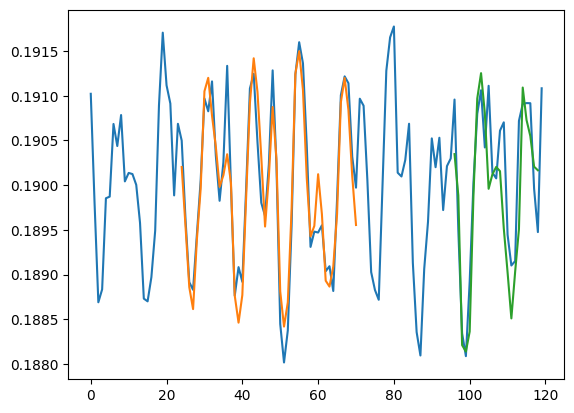

In [145]:
# LSTM 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, lookback):
 dataX, dataY = [], []
 for i in range(len(dataset)-lookback-1):
  a = dataset[i:(i+lookback), 0]
  dataX.append(a)
  dataY.append(dataset[i + lookback, 0])
 return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = pd.DataFrame(df.index.values)
dataframe["Eff"] = df["Efficiency"]
dataframe = pd.DataFrame(df["Efficiency"])
dataset = dataframe.values
# print(dataframe.head())
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * .6)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
lookback = 24
trainX, trainY = create_dataset(train, lookback)
testX, testY = create_dataset(test, lookback)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [150]:
# LSTM 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, lookback):
 dataX, dataY = [], []
 for i in range(len(dataset)-lookback-1):
  a = dataset[i:(i+lookback), 0]
  dataX.append(a)
  dataY.append(dataset[i + lookback, 0])
 return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = pd.DataFrame(df.index.values)
dataframe["Eff"] = df["Efficiency"]
dataframe = pd.DataFrame(df["Efficiency"])
dataset = dataframe.values
# print(dataframe.head())
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 1)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
lookback = 12
trainX, trainY = create_dataset(train, lookback)
testX, testY = create_dataset(test, lookback)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)
history = model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2, validation_split=.33)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

IndexError: tuple index out of range

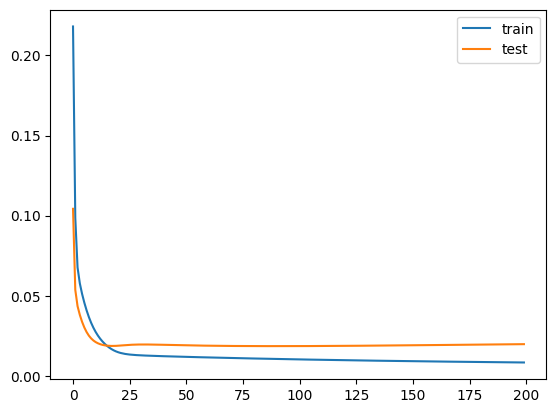

In [153]:
# history = model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

(95, 24) (95,)
Epoch 1/20


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 - 2s - 25ms/step - loss: 0.1789 - val_loss: 0.0654
Epoch 2/20
76/76 - 0s - 2ms/step - loss: 0.0847 - val_loss: 0.0455
Epoch 3/20
76/76 - 0s - 2ms/step - loss: 0.0644 - val_loss: 0.0358
Epoch 4/20
76/76 - 0s - 2ms/step - loss: 0.0496 - val_loss: 0.0290
Epoch 5/20
76/76 - 0s - 2ms/step - loss: 0.0354 - val_loss: 0.0248
Epoch 6/20
76/76 - 0s - 2ms/step - loss: 0.0250 - val_loss: 0.0233
Epoch 7/20
76/76 - 0s - 2ms/step - loss: 0.0196 - val_loss: 0.0228
Epoch 8/20
76/76 - 0s - 2ms/step - loss: 0.0168 - val_loss: 0.0225
Epoch 9/20
76/76 - 0s - 2ms/step - loss: 0.0151 - val_loss: 0.0221
Epoch 10/20
76/76 - 0s - 2ms/step - loss: 0.0141 - val_loss: 0.0217
Epoch 11/20
76/76 - 0s - 2ms/step - loss: 0.0134 - val_loss: 0.0213
Epoch 12/20
76/76 - 0s - 2ms/step - loss: 0.0130 - val_loss: 0.0210
Epoch 13/20
76/76 - 0s - 2ms/step - loss: 0.0127 - val_loss: 0.0207
Epoch 14/20
76/76 - 0s - 2ms/step - loss: 0.0124 - val_loss: 0.0205
Epoch 15/20
76/76 - 0s - 2ms/step - loss: 0.0122 - val_loss: 0.0203

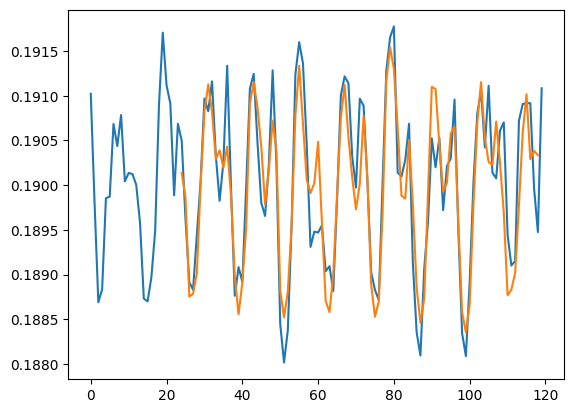

In [225]:
# LSTM 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, lookback):
 dataX, dataY = [], []
 for i in range(len(dataset)-lookback-1):
  a = dataset[i:(i+lookback), 0]
  dataX.append(a)
  dataY.append(dataset[i + lookback, 0])
 return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
lookback = 24
# load the dataset
dataframe = pd.DataFrame(df.index.values)
dataframe["Eff"] = df["Efficiency"]
dataframe = pd.DataFrame(df["Efficiency"])
dataset = dataframe.values
# print(dataframe.head())
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 1)
# test_size = lookback*10
train = dataset[0:train_size,:] #, dataset[len(dataset)-test_size:,:]

# reshape into X=t and Y=t+1

trainX, trainY = create_dataset(train, lookback)
# testX, testY = create_dataset(test, lookback)
# print(testX.shape)
print(trainX.shape,trainY.shape)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, validation_split=.2, epochs=20, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)
print(trainPredict.shape)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# trainPredictPlot[lookback:, :] = trainPredict

# shift test predictions for plotting
# testPredictPlot = np.empty((len(dataset)+len(testPredict),1))
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(dataset):, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
plt.show()

In [ ]:
# LSTM 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, lookback):
 dataX, dataY = [], []
 for i in range(len(dataset)-lookback-1):
  a = dataset[i:(i+lookback), 0]
  dataX.append(a)
  dataY.append(dataset[i + lookback, 0])
 return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
lookback = 24
# load the dataset
dataframe = pd.DataFrame(df.index.values)
dataframe["Eff"] = df["Efficiency"]
dataframe = pd.DataFrame(df["Efficiency"])
dataset = dataframe.values
# print(dataframe.head())
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 1)
# test_size = lookback*10
train = dataset[0:train_size,:] #, dataset[len(dataset)-test_size:,:]

# reshape into X=t and Y=t+1

trainX, trainY = create_dataset(train, lookback)
# testX, testY = create_dataset(test, lookback)
# print(testX.shape)
print(trainX.shape,trainY.shape)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, validation_split=.2, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)
print(trainPredict.shape)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
# testPredictPlot = np.empty((len(dataset)+len(testPredict),1))
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(dataset):, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
plt.show()

In [228]:
lookback=24
X = dataset[len(dataset)-lookback*2:,:]
print(X.shape)
forecast_X, forecast_Y = create_dataset(X,lookback)
print(forecast_X.shape,forecast_Y.shape)
forecast_X = np.reshape(forecast_X, (forecast_X.shape[0], 1, forecast_X.shape[1]))
print(forecast_X.shape,forecast_Y.shape)
Xforecast = model.predict(forecast_X)
print(Xforecast.shape)


# Xforecast = scaler.inverse_transform(Xforecast)
# forecast_Y = scaler.inverse_transform([forecast_Y])

# shift train predictions for plotting
XforecastPlot = np.empty((len(X)-1,1))
XforecastPlot[:, :] = np.nan
XforecastPlot[lookback:, :] = Xforecast

# plot baseline and predictions
# plt.plot(scaler.inverse_transform(X))
plt.plot(X)
plt.plot(XforecastPlot)
plt.show()

#next
X = dataset[len(dataset)-lookback-1:,:]
print(X.shape,Xforecast.shape)
X = np.append(X,Xforecast,axis=0)
print("XSHAPE",X.shape)

forecast_X, forecast_Y = create_dataset(X,lookback)
print(forecast_X.shape,forecast_Y.shape)
forecast_X = np.reshape(forecast_X, (forecast_X.shape[0], 1, forecast_X.shape[1]))
print(forecast_X.shape,forecast_Y.shape)
Xforecast = model.predict(forecast_X)
print(Xforecast.shape)


# Xforecast = scaler.inverse_transform(Xforecast)
# forecast_Y = scaler.inverse_transform([forecast_Y])

# shift train predictions for plotting
XforecastPlot = np.empty((len(X)-1,1))
XforecastPlot[:, :] = np.nan
XforecastPlot[lookback:, :] = Xforecast

# plot baseline and predictions
# plt.plot(scaler.inverse_transform(X))
plt.plot(X[0:25,:])
plt.plot(XforecastPlot)
plt.show()



(2, 1)
(0,) (0,)


IndexError: tuple index out of range

In [189]:
forecast_X, forecast_Y = create_dataset(X,lookback)

print(forecast_Y)
print(forecast_X)

[0.78253144 0.39440083 0.08701853 0.01879806 0.24050153 0.53601803
 0.74020529 0.81014933 0.63987911 0.82346253 0.56487999 0.54795757
 0.69001938 0.71470325 0.38031739 0.28862308 0.30186601 0.71911142
 0.7692568  0.77200201 0.77164414 0.51748335 0.38805295]
[[0.76416011 0.54260551 0.26896956 0.21580092 0.18659935 0.52896512
  0.86826749 0.96767698 1.         0.56483    0.55357552 0.60276235
  0.71053706 0.29656328 0.09033927 0.02078925 0.27840072 0.41871309
  0.66693169 0.58119924 0.66881733 0.45361904 0.5843614  0.60726903]
 [0.54260551 0.26896956 0.21580092 0.18659935 0.52896512 0.86826749
  0.96767698 1.         0.56483    0.55357552 0.60276235 0.71053706
  0.29656328 0.09033927 0.02078925 0.27840072 0.41871309 0.66693169
  0.58119924 0.66881733 0.45361904 0.5843614  0.60726903 0.78253144]
 [0.26896956 0.21580092 0.18659935 0.52896512 0.86826749 0.96767698
  1.         0.56483    0.55357552 0.60276235 0.71053706 0.29656328
  0.09033927 0.02078925 0.27840072 0.41871309 0.66693169 0.5

In [180]:
train_size = int(len(dataset) * 1)
# test_size = lookback*10
train = dataset[0:train_size,:] #, dataset[len(dataset)-test_size:,:]

# reshape into X=t and Y=t+1

trainX, trainY = create_dataset(train, lookback)
# testX, testY = create_dataset(test, lookback)
# print(testX.shape)
print(trainX.shape,trainY.shape)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
trainPredict = model.predict(trainX)


(95, 24) (95,)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


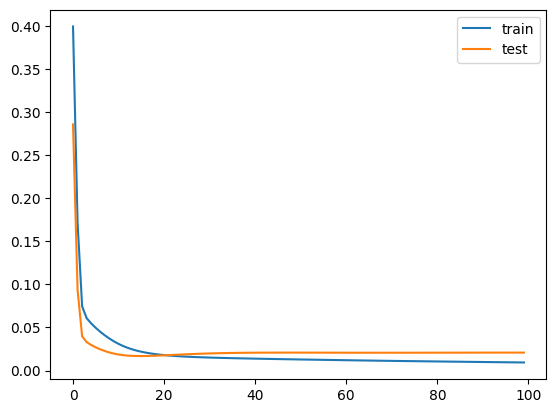

In [159]:
# history = model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [173]:
print(trainX.shape,trainY.shape)
# print(X)

(95, 1, 24) (1, 95)


###############################################################**END**###########################################################################

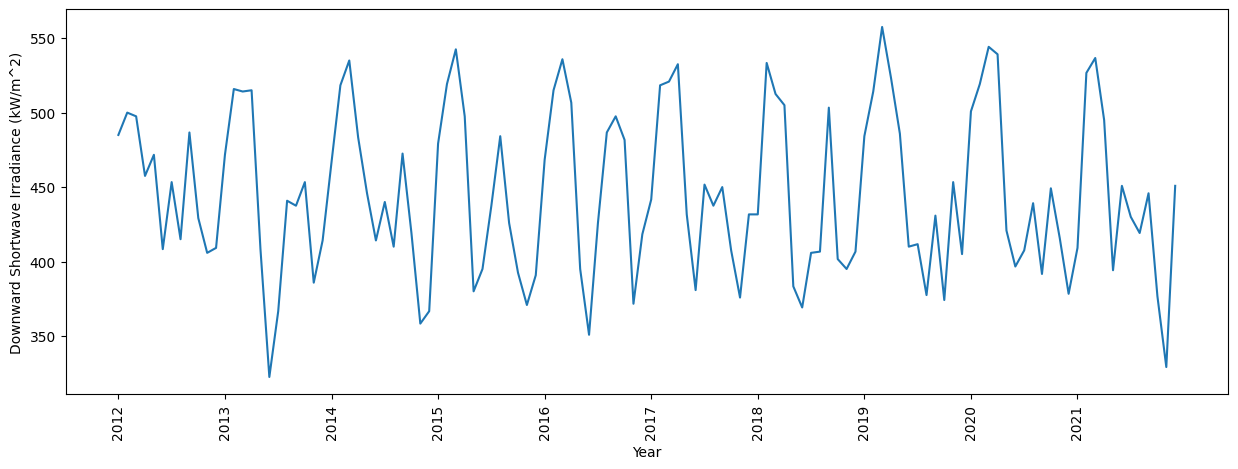

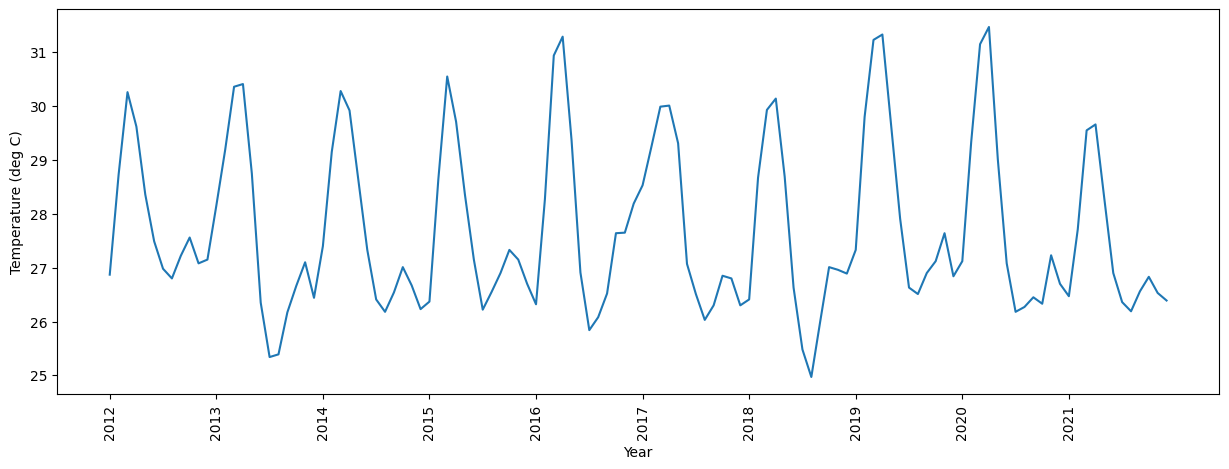

In [23]:
years = np.arange(2012,2022)
index = np.arange(0,len(df['TS']),12)

plt.figure(figsize=(15,5))
plt.plot(df.index,df['ALLSKY_SFC_SW_DWN']*1000/12)
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.ylabel("Downward Shortwave Irradiance (kW/m^2)")
plt.xlabel("Year")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df.index,df['TS'])
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.ylabel("Temperature (deg C)")
plt.xlabel("Year")
plt.show()

0.191022583191534
0.18980156488639716
0.1886900685290718
0.18883423636529112
0.18985366867793382
0.1898721945313526
0.19068491126356116
0.19043831779466247
0.1907849300291701
0.19004236214796355
0.19013721623685897
0.1901244529489075
0.1900037882720471
0.18957811077172662
0.1887307885339519
0.18870038065977598
0.18897150908206775
0.1894910808847679
0.19089256393345852
0.1917065913775473
0.19111752522379766
0.19091359624497148
0.1898857484465472
0.19068658686993933
0.1904990115692265
0.18962254228015124
0.1889145930837798
0.18882960719956782
0.18944487059514578
0.1900505484069691
0.19096990773894632
0.19082685009051226
0.19116120173257517
0.1903326311914881
0.189825425737368
0.19025667654872164
0.19133531804967138
0.18999240002572557
0.18876354722099392
0.18908337857745738
0.1889185009941246
0.1899616757098639
0.19108179762695768
0.19124498066786705
0.19048036399234203
0.18980308693811188
0.18965582215940005
0.1902331512867924
0.19128457366346407
0.19023052649725106
0.18844731917697924


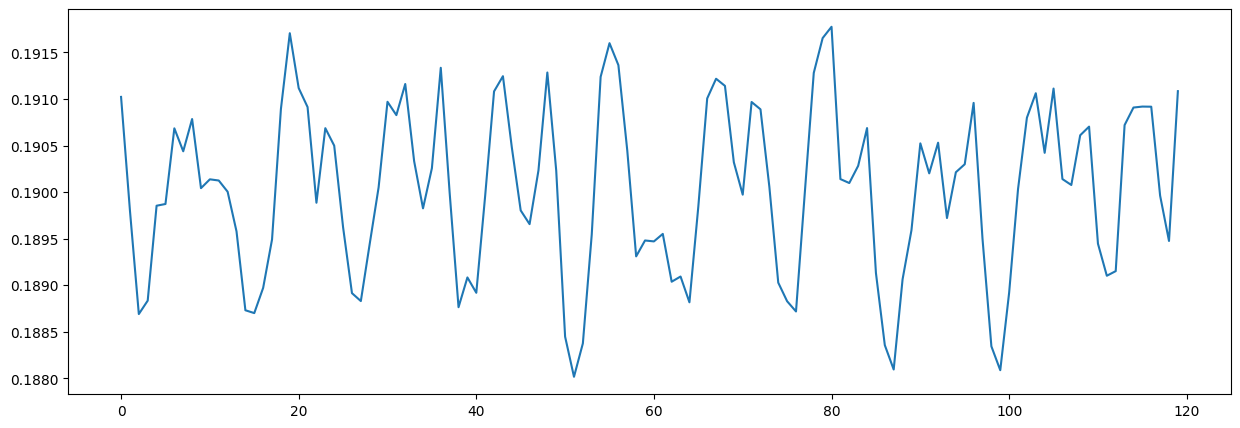

In [24]:
n = 1
k = 1.38*10**-23
q = 1.6*10**-19
T_ref = 298
H_ref = 1000
P_mpp_ref = 435
I_mpp_ref = 5.97
V_mpp_ref = 72.9
V_oc_ref = 85.6
I_sc_ref = 6.43
I_sc_coeff = 2.6*10**-3
V_oc_coeff = -.2355

Efficiency=np.empty(120)

for j in range(120):
        T = (df['TS'][j])+273
        H = (df['ALLSKY_SFC_SW_DWN'][j])*1000/12
    
        a_ref = n*k*T_ref/q
        R_s = (a_ref *128* math.log(1-(I_mpp_ref/I_sc_ref))-V_mpp_ref+V_oc_ref)/I_mpp_ref
        a = n*k*T/q

        I_pv = H*(I_sc_ref + I_sc_coeff*(T-T_ref))/H_ref
        I0 = I_pv/(math.exp((V_oc_ref + V_oc_coeff*(T-T_ref) - a_ref*128*math.log(I_sc_ref/I_pv))/(a*128)-1))

      
        I = np.arange(0,I_pv + I0,.0002)

        V = np.zeros_like(I)
        P = np.zeros_like(I)
        dP = np.zeros_like(I)
        L = np.zeros_like(I)
        K = np.zeros_like(I)
        for i in range(len(I)):
            V[i] = a*128*math.log((-(I[i]-I_pv-I0))/I0) - I[i]*R_s
            P[i] = V[i] * I[i]            
      
        '''
        for i in range(len(P)):
            if P[i] == np.max(P):
                print((I[i]*V[i]),I[i], V[i])
                break
        '''
        Efficiency[j] = np.max(P)/(H*2.162)
        print(Efficiency[j])

df["Efficiency"] = Efficiency

plt.figure(figsize=(15,5))
plt.plot(Efficiency)
plt.show()

Mean = 445.7638888888889
Std. Deviation = 54.68497569129956
Skewness = 0.12483512340729223
Kurtosis = -0.9542171041301124


<Axes: xlabel='ALLSKY_SFC_SW_DWN', ylabel='Density'>

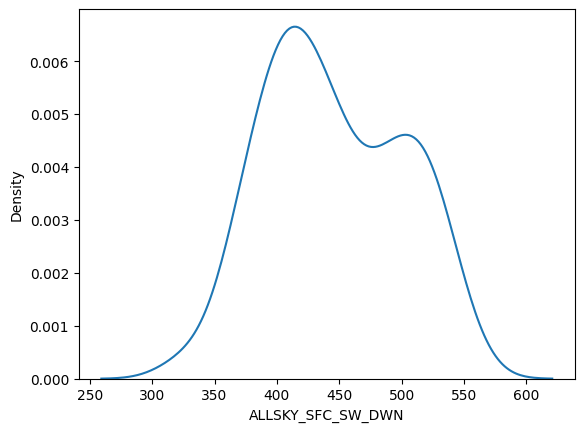

In [25]:
from scipy.stats import skew, kurtosis 

print("Mean =",np.mean(df['ALLSKY_SFC_SW_DWN']*1000/12))
print("Std. Deviation =",np.std(df['ALLSKY_SFC_SW_DWN']*1000/12))
print("Skewness =",skew(df['ALLSKY_SFC_SW_DWN']*1000/12))
print("Kurtosis =",kurtosis(df['ALLSKY_SFC_SW_DWN']*1000/12))
sns.kdeplot(df['ALLSKY_SFC_SW_DWN']*1000/12)

Mean = 27.70116666666667
Std. Deviation = 1.5511953365782862
Skewness = 0.7638287491158489
Kurtosis = -0.46950237464013833


<Axes: xlabel='TS', ylabel='Density'>

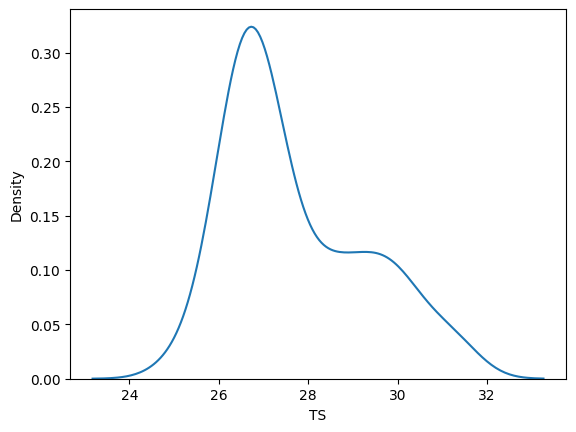

In [26]:
print("Mean =",np.mean(df['TS']))
print("Std. Deviation =",np.std(df['TS']))
print("Skewness =",skew(df['TS']))
print("Kurtosis =",kurtosis(df['TS']))
sns.kdeplot(df['TS'])

Mean = 0.1900303405590057
Std. Deviation = 0.0009065272318472181
Skewness = -0.22730333119559695
Kurtosis = -0.7996539675705083


<Axes: xlabel='Efficiency', ylabel='Density'>

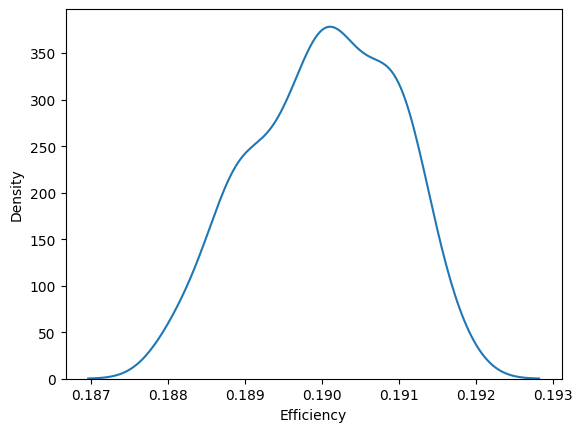

In [27]:
print("Mean =",np.mean(df['Efficiency']))
print("Std. Deviation =",np.std(df['Efficiency']))
print("Skewness =",skew(df['Efficiency']))
print("Kurtosis =",kurtosis(df['Efficiency']))
sns.kdeplot(df['Efficiency'])

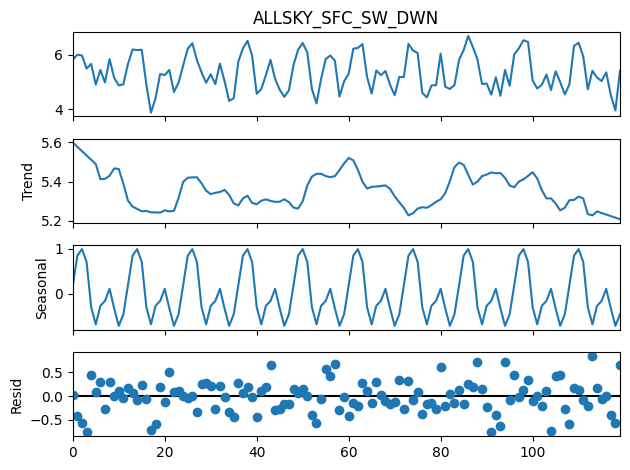

<Figure size 1500x1500 with 0 Axes>

Statistics=0.991, p=5.910695e-01


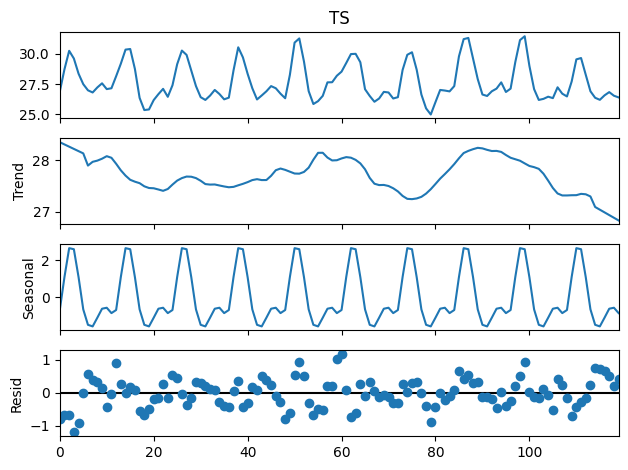

<Figure size 1500x1500 with 0 Axes>

Statistics=0.996, p=9.859847e-01


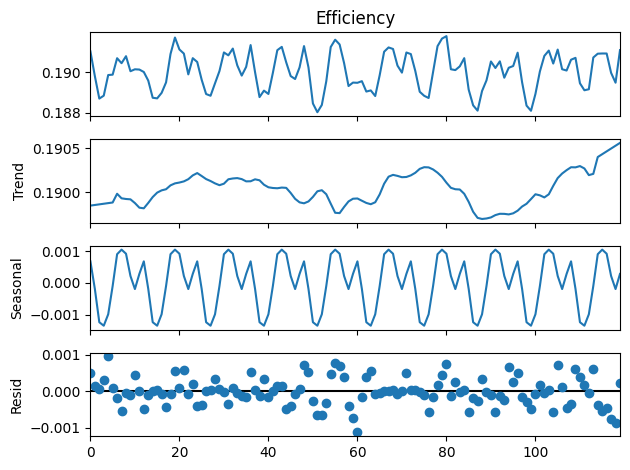

<Figure size 1500x1500 with 0 Axes>

Statistics=0.987, p=2.842988e-01


In [28]:
result = seasonal_decompose(df['ALLSKY_SFC_SW_DWN'], model='additive',extrapolate_trend="freq",  period=12)
result.plot()
plt.figure(figsize=(15,15))
plt.suptitle('Seasonal Decomposition')
plt.tight_layout()
plt.show()

stat, p = shapiro(result.resid)
print("Statistics=%.3f, p=%e" % (stat, p))

result = seasonal_decompose(df['TS'], model='additive',extrapolate_trend="freq",  period=12)
result.plot()
plt.figure(figsize=(15,15))
plt.suptitle('Seasonal Decomposition')
plt.tight_layout()
plt.show()

stat, p = shapiro(result.resid)
print("Statistics=%.3f, p=%e" % (stat, p))

result = seasonal_decompose(df["Efficiency"], model='additive',extrapolate_trend="freq",  period=12)
result.plot()
plt.figure(figsize=(15,15))
plt.suptitle('Seasonal Decomposition')
plt.tight_layout()
plt.show()

stat, p = shapiro(result.resid)
print("Statistics=%.3f, p=%e" % (stat, p))

In [29]:
df1 = df[((df["MO"]=="DEC") | (df["MO"]=="JAN") | (df["MO"] =="FEB"))]
df2 = df[((df["MO"]=="MAR") | (df["MO"]=="APR") | (df["MO"] =="MAY"))]
df3 = df[((df["MO"]=="JUN") | (df["MO"]=="JUL") | (df["MO"] =="AUG"))]
df4 = df[((df["MO"]=="SEP") | (df["MO"]=="OCT") | (df["MO"] =="NOV"))]

In [30]:
df1["Season"]="Dec_Feb"
df2["Season"]="Mar_May"
df3["Season"]="Jun_Aug"
df4["Season"]="Sep_Nov"
df["Season"]="All"

cdf = pd.concat([df1,df2,df3,df4,df])
cdf["ALLSKY_SFC_SW_DWN"] = cdf["ALLSKY_SFC_SW_DWN"]*1000/12
cdfT = cdf.drop(columns=["MO","ALLSKY_SFC_SW_DWN","Efficiency"])    
cdfR = cdf.drop(columns=["MO","TS","Efficiency"]) 
cdfE = cdf.drop(columns=["MO","ALLSKY_SFC_SW_DWN","TS"])    

C:\Users\HP\AppData\Local\Temp\ipykernel_8488\3856351273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Season"]="Dec_Feb"
C:\Users\HP\AppData\Local\Temp\ipykernel_8488\3856351273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Season"]="Mar_May"
C:\Users\HP\AppData\Local\Temp\ipykernel_8488\3856351273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

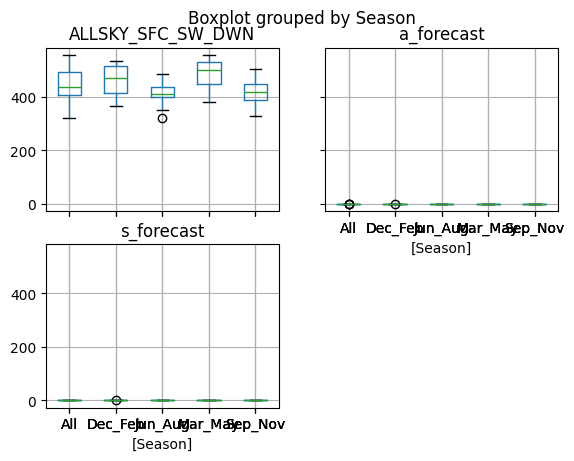

In [31]:
boxplot = cdfR.boxplot(by="Season")
plt.show()

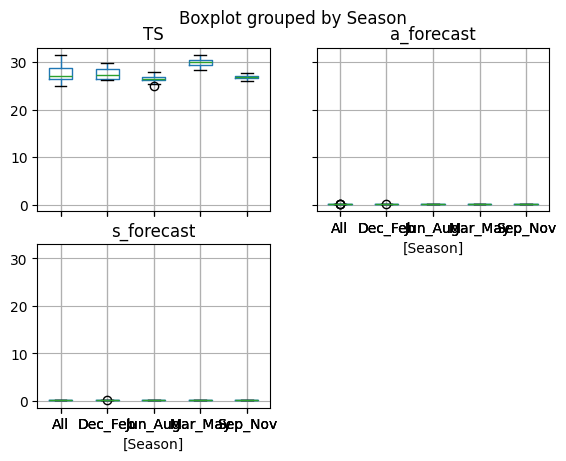

In [32]:
boxplot = cdfT.boxplot(by="Season")
plt.show()

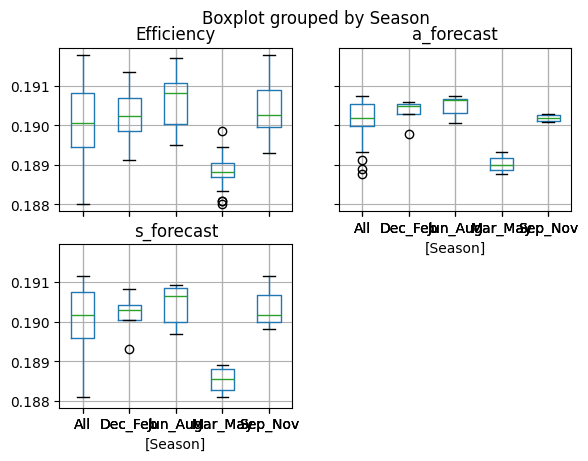

In [33]:
boxplot = cdfE.boxplot(by="Season")
plt.show()

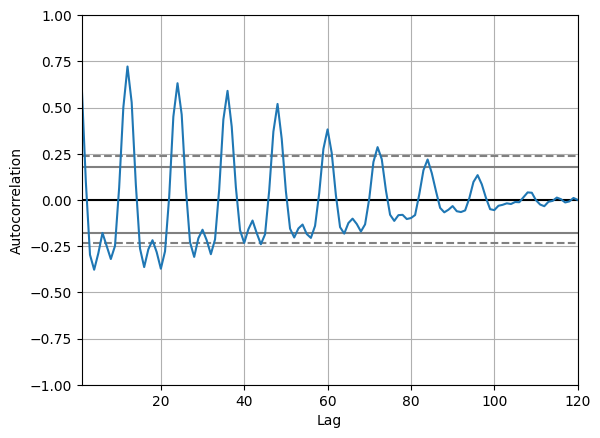

In [34]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Efficiency'])
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(eff):
    result=adfuller(eff,maxlag=12,autolag=None)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    return result

result=adfuller_test(df['Efficiency'])

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("Weak evidence against null hypothesis,indicating it is non-stationary ")



ADF Test Statistic : -1.9657842128042518
p-value : 0.30177402625768346
#Lags Used : 12
Number of Observations : 107
Weak evidence against null hypothesis,indicating it is non-stationary 


In [36]:
df['Efficiency First Difference'] = df['Efficiency'] - df['Efficiency'].shift(12)
#df['Efficiency First Difference']=df['Efficiency']-df['Efficiency'].shift(90)


In [37]:
result=adfuller_test(df['Efficiency First Difference'].dropna())

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("Weak evidence against null hypothesis,indicating it is non-stationary ")



ADF Test Statistic : -3.0836862464648753
p-value : 0.027784272837475428
#Lags Used : 12
Number of Observations : 95
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


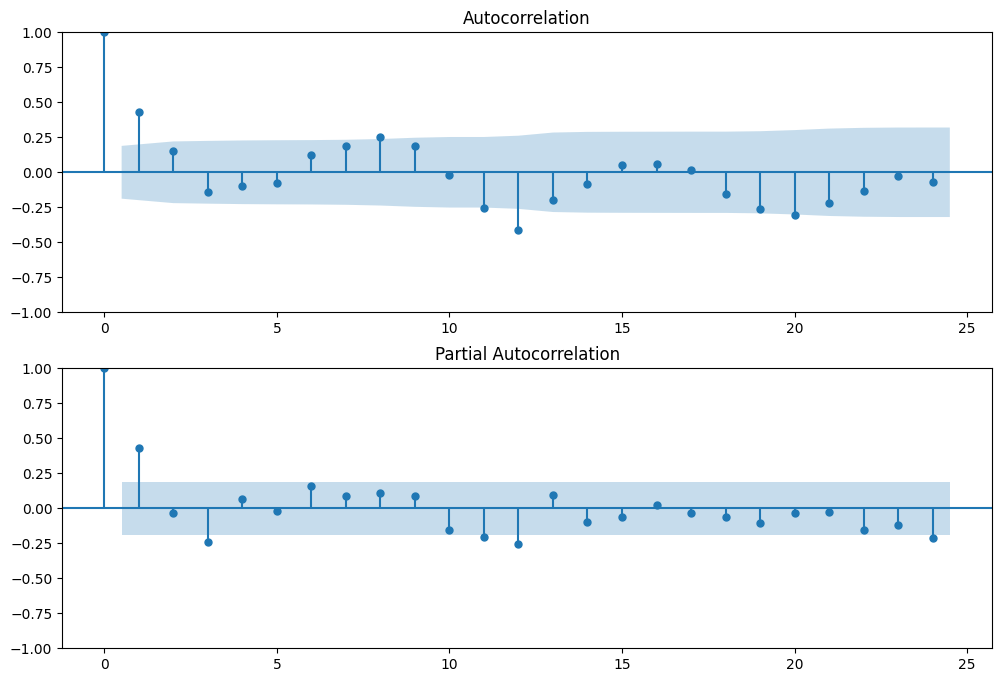

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Efficiency First Difference'].dropna(),lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Efficiency First Difference'].dropna(),lags=24,ax=ax2)

In [39]:
import statsmodels.api as sm
models=sm.tsa.statespace.SARIMAX(df['Efficiency'],seasonal_order=(2,1,2,12),enforce_stationarity=False)
models_fit=models.fit()
models_fit.summary()



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                              Efficiency   No. Observations:                  120
Model:             SARIMAX(1, 0, 0)x(2, 1, [1, 2], 12)   Log Likelihood                 514.652
Date:                                 Sun, 14 Jul 2024   AIC                          -1017.303
Time:                                         21:19:53   BIC                          -1002.790
Sample:                                              0   HQIC                         -1011.473
                                                 - 120                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4389      0.104      4.207      0.000       0.234       0.643
ar.S.L12      -0.8601      0.205     -4.187      0.000      -1.263      -0.457
ar.S.L24      -0.4130      0.169     -2.449      0.014      -0.744      -0.082
ma.S.L12   -1.492e-08      0.247  -6.04e-08      1.000      -0.484       0.484
ma.S.L24    -1.12e-07      0.198  -5.65e-07      1.000      -0.388       0.388
sigma2      2.391e-07    5.3e-08      4.515      0.000    1.35e-07    3.43e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.80   Prob(JB):                         0.39
Heteroskedasticity (H):               1.60   Skew:                             0.36
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
from statsmodels.tsa.arima.model import ARIMA
modela=ARIMA(df['Efficiency'],order=(2,0,2))
modela_fit=modela.fit()
modela_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Efficiency   No. Observations:                  120
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 722.009
Date:                Sun, 14 Jul 2024   AIC                          -1432.019
Time:                        21:19:54   BIC                          -1415.294
Sample:                             0   HQIC                         -1425.227
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1900      0.000   1859.859      0.000       0.190       0.190
ar.L1          0.9884      0.185      5.349      0.000       0.626       1.351
ar.L2         -0.6251      0.125     -4.994      0.000      -0.870      -0.380
ma.L1         -0.0547      0.193     -0.283      0.777      -0.433       0.324
ma.L2          0.2251      0.167      1.345      0.179      -0.103       0.553
sigma2      3.423e-07   5.48e-08      6.249      0.000    2.35e-07     4.5e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.83   Prob(JB):                         0.91
Heteroskedasticity (H):               1.35   Skew:                             0.02
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

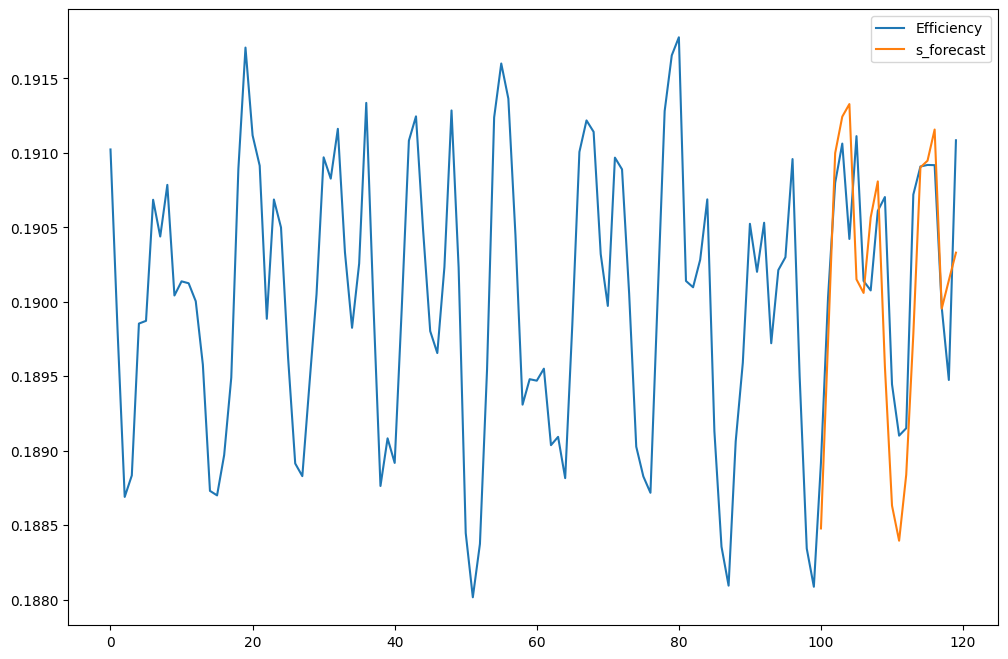

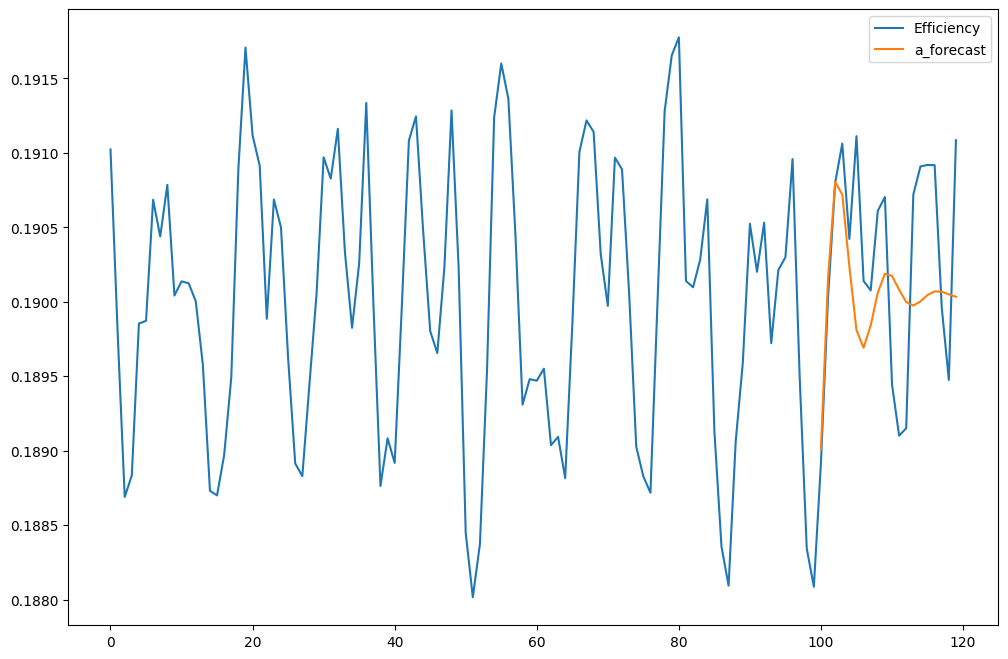

In [41]:
df['s_forecast']=models_fit.predict(start=100,end=120,dynamic=True)
df['a_forecast']=modela_fit.predict(start=100,end=120,dynamic=True)

df[['Efficiency','s_forecast']].plot(figsize=(12,8))
df[['Efficiency','a_forecast']].plot(figsize=(12,8))
plt.show()

In [42]:
# LSTM 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, lookback):
 dataX, dataY = [], []
 for i in range(len(dataset)-lookback-1):
  a = dataset[i:(i+lookback), 0]
  dataX.append(a)
  dataY.append(dataset[i + lookback, 0])
 return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
# dataframe = pd.DataFrame(df.index.values)
# dataframe["Eff"] = df["Efficiency"]
dataframe = pd.DataFrame(df["Efficiency"])
dataset = dataframe.values
# print(dataframe.head())
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * .6)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
lookback = 24
trainX, trainY = create_dataset(train, lookback)
testX, testY = create_dataset(test, lookback)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/20


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 - 1s - 27ms/step - loss: 0.1207
Epoch 2/20
47/47 - 0s - 2ms/step - loss: 0.0611
Epoch 3/20
47/47 - 0s - 1ms/step - loss: 0.0520
Epoch 4/20
47/47 - 0s - 1ms/step - loss: 0.0449
Epoch 5/20
47/47 - 0s - 1ms/step - loss: 0.0382
Epoch 6/20
47/47 - 0s - 1ms/step - loss: 0.0322
Epoch 7/20
47/47 - 0s - 1ms/step - loss: 0.0272
Epoch 8/20
47/47 - 0s - 1ms/step - loss: 0.0235
Epoch 9/20
47/47 - 0s - 1ms/step - loss: 0.0210
Epoch 10/20
47/47 - 0s - 1ms/step - loss: 0.0195
Epoch 11/20
47/47 - 0s - 1ms/step - loss: 0.0185
Epoch 12/20
47/47 - 0s - 1ms/step - loss: 0.0178
Epoch 13/20
47/47 - 0s - 1ms/step - loss: 0.0173
Epoch 14/20
47/47 - 0s - 1ms/step - loss: 0.0169
Epoch 15/20
47/47 - 0s - 1ms/step - loss: 0.0166
Epoch 16/20
47/47 - 0s - 1ms/step - loss: 0.0163
Epoch 17/20
47/47 - 0s - 1ms/step - loss: 0.0161
Epoch 18/20
47/47 - 0s - 1ms/step - loss: 0.0158
Epoch 19/20
47/47 - 0s - 1ms/step - loss: 0.0156
Epoch 20/20
47/47 - 0s - 1ms/step - loss: 0.0154
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


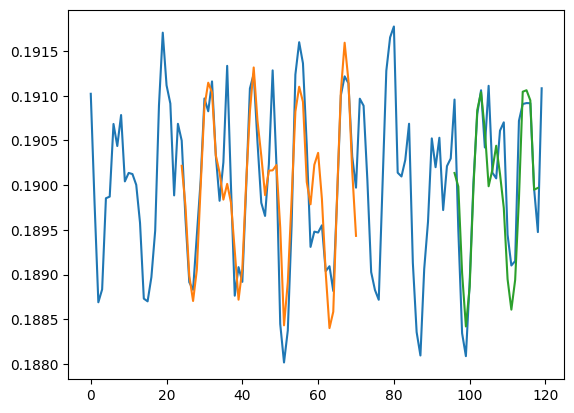

In [43]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
# LSTM 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, lookback):
 dataX, dataY = [], []
 for i in range(len(dataset)-lookback-1):
  a = dataset[i:(i+lookback), 0]
  dataX.append(a)
  dataY.append(dataset[i + lookback, 0])
 return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
# dataframe = pd.DataFrame(df.index.values)
# dataframe["Eff"] = df["Efficiency"]
dataframe = pd.DataFrame(df["Efficiency"])
dataset = dataframe.values
# print(dataframe.head())
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
# train_size = int(len(dataset) * .6)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
lookback = 24
trainX, trainY = create_dataset(dataset, lookback)
# testX, testY = create_dataset(test, lookback)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)

Epoch 1/20


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 - 1s - 12ms/step - loss: 0.1010
Epoch 2/20
95/95 - 0s - 2ms/step - loss: 0.0493
Epoch 3/20
95/95 - 0s - 1ms/step - loss: 0.0396
Epoch 4/20
95/95 - 0s - 1ms/step - loss: 0.0302
Epoch 5/20
95/95 - 0s - 1ms/step - loss: 0.0230
Epoch 6/20
95/95 - 0s - 1ms/step - loss: 0.0191
Epoch 7/20
95/95 - 0s - 1ms/step - loss: 0.0174
Epoch 8/20
95/95 - 0s - 1ms/step - loss: 0.0165
Epoch 9/20
95/95 - 0s - 1ms/step - loss: 0.0159
Epoch 10/20
95/95 - 0s - 1ms/step - loss: 0.0154
Epoch 11/20
95/95 - 0s - 1ms/step - loss: 0.0151
Epoch 12/20
95/95 - 0s - 1ms/step - loss: 0.0148
Epoch 13/20
95/95 - 0s - 1ms/step - loss: 0.0146
Epoch 14/20
95/95 - 0s - 1ms/step - loss: 0.0144
Epoch 15/20
95/95 - 0s - 1ms/step - loss: 0.0142
Epoch 16/20
95/95 - 0s - 1ms/step - loss: 0.0141
Epoch 17/20
95/95 - 0s - 1ms/step - loss: 0.0139
Epoch 18/20
95/95 - 0s - 2ms/step - loss: 0.0138
Epoch 19/20
95/95 - 0s - 1ms/step - loss: 0.0136
Epoch 20/20
95/95 - 0s - 1ms/step - loss: 0.0135
1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/stepW

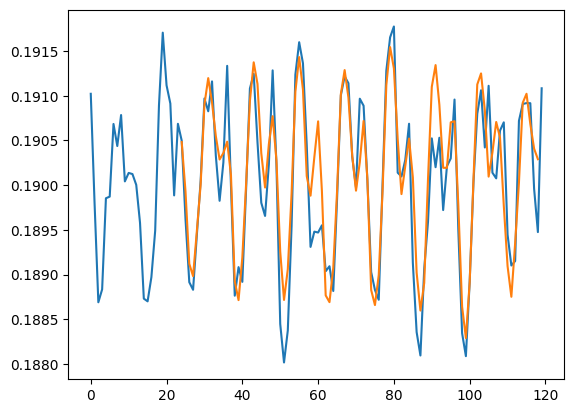

In [45]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
(48, 1)


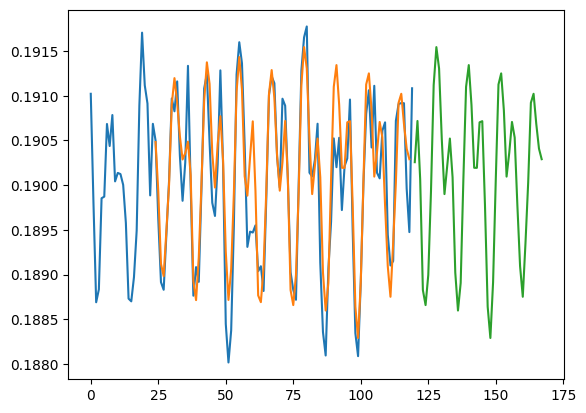

In [46]:
X_ = trainX[- 2*lookback:]  # last available input sequence


Y_ = model.predict(X_)
Y_ = scaler.inverse_transform(Y_)
print(Y_.shape)

testPredictPlot = np.empty((168,1))

testPredictPlot[:, :] = np.nan
testPredictPlot[120:, :] = Y_

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [47]:
Y_.shape
trainPredict.shape
trainX.shape
Y_.shape

(48, 1)

In [48]:
y = dataset
# scale the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = scaler.fit(y)
# y = scaler.transform(y)

# generate the input and output sequences
lookback = 24  # length of input sequences (lookback period)
forecast = 12  # length of output sequences (forecast period)

X = []
Y = []

for i in range(lookback, len(y) - forecast + 1):
    X.append(y[i - lookback: i])
    Y.append(y[i: i + forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
model.add(LSTM(units=4, return_sequences=True, input_shape=(lookback, 1)))
model.add(LSTM(units=4))
model.add(Dense(forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, verbose=2)

# generate the forecasts
X_ = y[- lookback:]  # last available input sequence
X_ = X_.reshape(1, lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

print(Y_)



Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 - 4s - 1s/step - loss: 0.3484
Epoch 2/100
3/3 - 0s - 16ms/step - loss: 0.3424
Epoch 3/100
3/3 - 0s - 17ms/step - loss: 0.3367
Epoch 4/100
3/3 - 0s - 16ms/step - loss: 0.3311
Epoch 5/100
3/3 - 0s - 14ms/step - loss: 0.3254
Epoch 6/100
3/3 - 0s - 13ms/step - loss: 0.3196
Epoch 7/100
3/3 - 0s - 14ms/step - loss: 0.3137
Epoch 8/100
3/3 - 0s - 15ms/step - loss: 0.3075
Epoch 9/100
3/3 - 0s - 15ms/step - loss: 0.3011
Epoch 10/100
3/3 - 0s - 15ms/step - loss: 0.2945
Epoch 11/100
3/3 - 0s - 15ms/step - loss: 0.2875
Epoch 12/100
3/3 - 0s - 15ms/step - loss: 0.2804
Epoch 13/100
3/3 - 0s - 16ms/step - loss: 0.2729
Epoch 14/100
3/3 - 0s - 16ms/step - loss: 0.2652
Epoch 15/100
3/3 - 0s - 15ms/step - loss: 0.2574
Epoch 16/100
3/3 - 0s - 15ms/step - loss: 0.2495
Epoch 17/100
3/3 - 0s - 14ms/step - loss: 0.2416
Epoch 18/100
3/3 - 0s - 15ms/step - loss: 0.2340
Epoch 19/100
3/3 - 0s - 15ms/step - loss: 0.2266
Epoch 20/100
3/3 - 0s - 16ms/step - loss: 0.2195
Epoch 21/100
3/3 - 0s - 24ms/step - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.5212346 ]
 [0.52056134]
 [0.5238065 ]
 [0.5335456 ]
 [0.53654397]
 [0.52248526]
 [0.5394875 ]
 [0.52068335]
 [0.5264639 ]
 [0.52073437]
 [0.5408326 ]
 [0.53398573]]


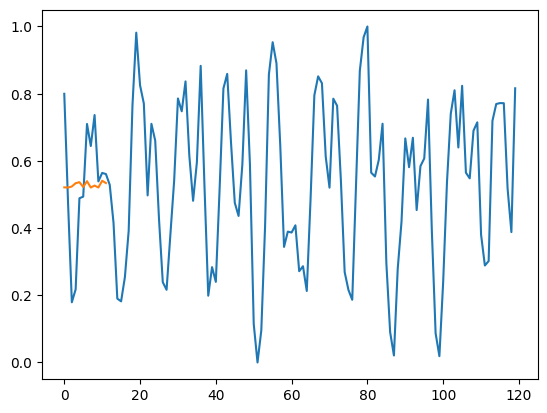

In [49]:
Y_ = model.predict(X_).reshape(-1, 1)
# Y_ = scaler.inverse_transform(Y_)

print(Y_)


plt.plot(y)

plt.plot(Y_)

In [50]:
# calculate root mean squared error

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.6f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.6f RMSE' % (testScore))

Train Score: 0.000431 RMSE
Test Score: 0.000495 RMSE
